In [3]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
from random import randint
from math import isnan
import itertools as  itr
import itertools
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

In [4]:
prj = "SE.MATS.JC.txt"
data = pd.read_table(f"{prj}")
data.columns

Index(['chr', 'exonStart_0base', 'exonEnd', 'upstreamESt', 'upstreamEEn',
       'downstreamESt', 'downstreamEEn', 'ID', 'GeneID', 'GeneSymbol',
       'strand', 'ID1', 'IJC_Sample1', 'SJC_Sample1', 'IJC_Sample2',
       'SJC_Sample2', 'IJC_Sample1.1', 'SJC_Sample1.1', 'IJC_Sample2.1',
       'SJC_Sample2.1', 'IJC_Sample1.2', 'SJC_Sample1.2', 'IJC_Sample2.2',
       'SJC_Sample2.2', 'IncFormLen', 'SkipFormLen', 'PValue', 'FDR',
       'IncLevel1', 'IncLevel2', 'IncLevelDifference', 'locuslinkid'],
      dtype='object')

In [5]:
def find_indices(words):
    indices = []
    for index, word in enumerate(words):
        if 'IJC' in word or 'SJC' in word:
            indices.append(index)
    return indices

indices = find_indices(data.columns)

[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [63]:
lst = []
lst_ = []
for i in (indices):
    lst.append(np.array(data[data.columns[i]]))
    
for i in (indices):
    lst_.append(data.columns[i])
    

IJC_SJC = [[]] * len(data.index)

for i in data.index:
    for j in range(len(lst)):
        if type(lst[j][i]) == float:
            print(j, i, lst[j][i])
        lst[j][i] = lst[j][i].split(',')
        lst[j][i] = list(map(int, lst[j][i]))
        if j % 2:
            IJC_SJC[i] = lst[j][i] + IJC_SJC[i]
        else:
            IJC_SJC[i] = IJC_SJC[i] + lst[j][i]
        
    
for i in range(len(lst)):
    data[lst_[i]] = lst[i]

data['IJC_SJC'] = IJC_SJC
data

,chr,exonStart_0base,exonEnd,upstreamESt,upstreamEEn,downstreamESt,downstreamEEn,ID,GeneID,GeneSymbol,...,SJC_Sample2.2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference,locuslinkid,IJC_SJC
0,chr21,29071951,29071988,29070246,29070337,29073259,29073351,5,ENSG00000156261,Cct8,...,"[0, 0, 1, 0, 0]",136,99,1.0,1.0,"NA,NA,NA,NA,1.0","1.0,1.0,0.421,NA,NA",0.193,"0,0,0,0,0","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,chr21,29071951,29071988,29070246,29070337,29073530,29073797,6,ENSG00000156261,Cct8,...,"[135, 142, 172, 108, 179]",136,99,1.0,1.0,"0.0,0.0,0.0,0.0,0.026","0.005,0.03,0.004,0.0,0.0",-0.003,"0,0,0,0,0","[135, 142, 172, 108, 179, 59, 22, 41, 22, 27, ..."
2,chr21,14853273,14853431,14825522,14825624,14857541,14857708,9,ENSG00000281903,Linc02246,...,"[4, 3, 2, 1, 3]",198,99,1.0,1.0,"NA,NA,0.0,1.0,0.0","0.0,0.25,0.333,0.333,0.0",0.15,"0,0,0,0,0","[4, 3, 2, 1, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ..."
3,chr21,14853273,14853431,14837181,14837823,14857541,14857708,10,ENSG00000281903,Linc02246,...,"[0, 0, 0, 1, 0]",198,99,1.0,1.0,"0.0,NA,NA,1.0,NA","NA,1.0,1.0,0.333,NA",-0.278,"0,0,0,0,0","[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
4,chr21,14857541,14857708,14825522,14825624,14918170,14918552,11,ENSG00000281903,Linc02246,...,"[0, 0, 1, 0, 0]",198,99,1.0,1.0,"NA,NA,1.0,NA,1.0","1.0,1.0,0.5,1.0,1.0",0.1,"0,0,0,0,0","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50547,chr13,26676548,26676724,26671871,26671989,26680034,26680201,85491,ENSG00000132970,Wasf3,...,"[73, 108, 56, 287, 73]",198,99,0.9209326,1.0,"0.368,0.32,0.481,0.404,0.4","0.497,0.327,0.584,0.193,0.368",0.001,"0,0,0,0,0","[73, 108, 56, 287, 73, 12, 17, 7, 17, 18, 12, ..."
50548,chr13,26680034,26680201,26676548,26676724,26681053,26681320,85492,ENSG00000132970,Wasf3,...,"[17, 14, 25, 12, 11]",198,99,7.1464605E-8,1.1723232E-5,"1.0,1.0,1.0,0.667,0.333","0.171,0.176,0.231,0.314,0.214",0.579,"0,0,0,0,0","[17, 14, 25, 12, 11, 0, 0, 0, 1, 1, 0, 0, 0, 1..."
50549,chr13,37569299,37569383,37564518,37564560,37569743,37569790,85504,ENSG00000133110,Postn,...,"[2, 0, 0, 4, 2]",183,99,1.0,1.0,"0.0,0.0,NA,0.0,0.52","0.0,NA,NA,0.0,0.351",0.013,"0,0,0,0,0","[2, 0, 0, 4, 2, 4, 3, 0, 17, 1, 4, 3, 0, 17, 1..."
50550,chr13,37571368,37571458,37570579,37570669,37577752,37577798,85506,ENSG00000133110,Postn,...,"[0, 0, 2, 0, 0]",189,99,1.0,1.0,"1.0,1.0,1.0,1.0,NA","NA,NA,0.44,1.0,1.0",0.187,"0,0,0,0,0","[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [64]:
lst = []
ln = len(data['IJC_SJC'][0])
for i in data.index:
    lst.append(np.abs(np.log(sum(data['IJC_SJC'][i][:ln // 2]) /
               sum(data['IJC_SJC'][i][ln // 2:]))))
    
data['flag'] = lst
data = data.loc[data['flag'] < 5]

lst = []
for i in data.index:
    lst.append(min(list(map(sum, [data[lst_[0]][i], data[lst_[1]][i], data[lst_[2]][i], data[lst_[3]][i]]))))

data['flag2'] = lst
data = data.loc[data['flag2'] >= 3]

data

C:\Users\OURMAN~1\AppData\Local\Temp/ipykernel_12088/1008889191.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['flag2'] = lst


,chr,exonStart_0base,exonEnd,upstreamESt,upstreamEEn,downstreamESt,downstreamEEn,ID,GeneID,GeneSymbol,...,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference,locuslinkid,IJC_SJC,flag,flag2
1,chr21,29071951,29071988,29070246,29070337,29073530,29073797,6,ENSG00000156261,Cct8,...,99,1.0,1.0,"0.0,0.0,0.0,0.0,0.026","0.005,0.03,0.004,0.0,0.0",-0.003,"0,0,0,0,0","[135, 142, 172, 108, 179, 59, 22, 41, 22, 27, ...",4.580042,8
2,chr21,14853273,14853431,14825522,14825624,14857541,14857708,9,ENSG00000281903,Linc02246,...,99,1.0,1.0,"NA,NA,0.0,1.0,0.0","0.0,0.25,0.333,0.333,0.0",0.15,"0,0,0,0,0","[4, 3, 2, 1, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",0.750306,5
11,chr21,20757218,20757417,20742920,20743833,20778417,20778547,44,ENSG00000224924,Linc00320,...,99,0.0039734966,0.083740495,"0.0,1.0,0.0,0.0,0.0","0.167,0.126,0.127,0.067,1.0",-0.097,"0,0,0,0,0","[30, 38, 24, 28, 0, 3, 0, 2, 6, 5, 3, 0, 2, 6,...",1.284512,37
14,chr21,20757310,20757417,20742470,20743833,20778417,20778547,47,ENSG00000224924,Linc00320,...,99,0.07657287,0.84297216,"0.143,1.0,0.0,0.0,0.167","0.231,0.262,0.2,0.164,1.0",-0.109,"0,0,0,0,0","[30, 38, 24, 28, 0, 3, 0, 2, 6, 5, 3, 0, 2, 6,...",0.540273,73
17,chr21,20778642,20778762,20775041,20778547,20781348,20781474,51,ENSG00000224924,Linc00320,...,99,0.010430956,0.1806272,"0.913,0.652,1.0,0.913,0.913","0.684,0.64,0.747,0.94,1.0",0.076,"0,0,0,0,0","[12, 18, 12, 7, 0, 1, 4, 0, 1, 1, 1, 4, 0, 1, ...",2.219775,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50533,chr1,217498355,217498395,217449248,217449337,217514821,217514889,85463,ENSG00000092978,Gpatch2,...,99,1.0,1.0,"NA,1.0,NA,1.0,1.0","0.416,NA,0.681,0.588,0.517",0.45,"0,0,0,0,0","[1, 0, 1, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.716678,7
50542,chr2,242130654,242130812,242122286,242122455,242138783,242138888,85484,ENSG00000291147,Na,...,99,1.0,1.0,"0.0,0.0,NA,0.0,0.0","0.091,0.111,0.091,0.0,0.333",-0.125,"0,0,0,0,0","[10, 4, 10, 19, 2, 3, 2, 0, 1, 3, 0, 0, 0, 0, ...",2.254383,3
50545,chr2,242138783,242138888,242122286,242122455,242159348,242159498,85487,ENSG00000291147,Na,...,99,1.0,1.0,"1.0,1.0,NA,1.0,1.0","1.0,0.429,0.833,1.0,0.5",0.248,"0,0,0,0,0","[0, 4, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.525729,5
50547,chr13,26676548,26676724,26671871,26671989,26680034,26680201,85491,ENSG00000132970,Wasf3,...,99,0.9209326,1.0,"0.368,0.32,0.481,0.404,0.4","0.497,0.327,0.584,0.193,0.368",0.001,"0,0,0,0,0","[73, 108, 56, 287, 73, 12, 17, 7, 17, 18, 12, ...",0.048626,568


In [127]:
def corr_pirs_gene(data, GeneID = 'Ablim2', delta = 0.0001, f = False):
    s = 0
    corr = []
    df = (data.loc[data['GeneID'] == GeneID])
    if len(df) < 2:
        return []
    for i in range(1, len(df.index)):
        for j in range(i):
            k = min(len(df["IJC_SJC"][df.index[i]]), len(df["IJC_SJC"][df.index[j]]))
            VAL = np.vstack((df["IJC_SJC"][df.index[i]][:k], df["IJC_SJC"][df.index[j]][:k]))
            l = 0
            psi1, psi2 = sum(VAL[0][k // 2:]) / sum(VAL[0]), sum(VAL[1][k // 2:]) / sum(VAL[1])
            VAL = np.vstack((VAL[0][k // 2:], VAL[1][k // 2:], VAL[0][:k // 2], VAL[1][:k // 2]))
            #en = -((psi1 + psi2)/2) * np.log2((psi1 + psi2)/2) * (2-abs(np.corrcoef(VAL[0], VAL[1])[0][1]))
            pvalue = sps.spearmanr(VAL[0], VAL[1]).pvalue
            corr = (sps.spearmanr(VAL[0], VAL[1]).statistic * np.sum((VAL[0], VAL[1])) + 
                    sps.spearmanr(VAL[2], VAL[3]).statistic * np.sum((VAL[2], VAL[3]))) / np.sum(VAL)
            if pvalue < delta:
                s += 1
                if f:
                    with open(f, 'a') as out:
                        print(GeneID, df['GeneSymbol'][df.index[i]],
                              df['ID'][df.index[i]], df['ID'][df.index[j]], 
                              pvalue,
                              corr,
                              #df['flag'][df.index[i]], df['flag'][df.index[j]],
                              df['exonStart_0base'][df.index[i]], df['exonStart_0base'][df.index[j]], 
                              df['exonEnd'][df.index[i]], df['exonEnd'][df.index[j]],
                              #df['num'][df.index[i]], df['num'][df.index[j]], 
                              psi1,
                              psi2,
                              #en,
                              #sum(VAL[0][k // 2:]) * sum(VAL[1]) / (sum(VAL[1][k // 2:]) * sum(VAL[0]))
                              sep = '\t', file = out)
                else:
                    print(GeneID, df['geneSymbol'][df.index[i]],
                          df['ID'][df.index[i]], df['ID'][df.index[j]], 
                          pvalue,
                          corr,
                          #df['flag'][df.index[i]], df['flag'][df.index[j]],
                          df['exonStart_0base'][df.index[i]], df['exonStart_0base'][df.index[j]], 
                          df['exonEnd'][df.index[i]], df['exonEnd'][df.index[j]],
                          #df['num'][df.index[i]], df['num'][df.index[j]], 
                          psi1,
                          psi2,
                          sps.spearmanr(VAL[0], VAL[1]).statistic,
                          #en,
                          #sum(VAL[0][k // 2:]) * sum(VAL[1]) / (sum(VAL[1][k // 2:]) * sum(VAL[0])),  
                          sep = '\t')
    return corr

In [128]:
sum_, corr, f = 0, [], f"merged_Included{prj}.txt"
if f:
    with open(f, 'w') as out:
        print('GeneID', 'GeneSymbol', 'id1', 'id2', 'pvalue', 'spearmanr', 'exonstart1', 'exonstart2', "exonend1", "exonend2", "psi1", "psi2", sep = '	', file = out)
print('GeneID', 'GeneSymbol', 'id1', 'id2', 'pvalue', 'spearmanr', 'log1', 'log2', 'exonstart1', 'exonstart2', "exonend1", "exonend2", "psi1", "psi2", sep = '	')
for i in sorted(list(set(data['GeneID'].tolist()))):
    corr += corr_pirs_gene(data, delta = 0.000001, GeneID = i, f = f)
    pass
#gs = 'Sorbs1'
#corr_pirs_gene(data, delta = 2, GeneID = data.loc[data['GeneSymbol'] == gs]['GeneID'].tolist()[0], gr_size = 5, f = f)

GeneID	GeneSymbol	id1	id2	pvalue	spearmanr	log1	log2	exonstart1	exonstart2	exonend1	exonend2	psi1	psi2


In [129]:
mxe = pd.read_table(f, sep = "	")
mxe

,GeneID,GeneSymbol,id1,id2,pvalue,spearmanr,exonstart1,exonstart2,exonend1,exonend2,psi1,psi2
0,ENSRNOG00000000044,Tmem175,14772,14768,1.202445e-21,0.811288,1078453,1077178,1078505,1077343,0.826107,0.980486
1,ENSRNOG00000000044,Tmem175,14773,14768,4.458457e-28,0.868008,1081791,1077178,1082045,1077343,0.932703,0.980486
2,ENSRNOG00000000044,Tmem175,14773,14772,6.102953e-24,0.849788,1081791,1078453,1082045,1078505,0.932703,0.826107
3,ENSRNOG00000000048,Gak,4072,4069,4.643321e-43,0.950086,1106494,1103361,1106620,1103504,0.962533,0.991225
4,ENSRNOG00000000048,Gak,4074,4069,2.815664e-36,0.919628,1135808,1103361,1135955,1103504,0.958991,0.991225
...,...,...,...,...,...,...,...,...,...,...,...,...
7143,ENSRNOG00000070619,LOC103692795,22047,22045,4.552347e-24,0.728465,15917125,15914501,15917256,15914646,0.423134,0.853791
7144,ENSRNOG00000070619,LOC103692795,22047,22046,5.305025e-21,0.799152,15917125,15914501,15917256,15914646,0.423134,0.589909
7145,ENSRNOG00000070948,NaN,2169,2168,1.606155e-16,0.702041,20645627,20645627,20645771,20645771,0.750000,0.688442
7146,ENSRNOG00000071066,Stum,4999,4996,1.531241e-53,0.958184,92182560,92179107,92182740,92179116,0.980241,0.957253


In [130]:
mxe

,GeneID,GeneSymbol,id1,id2,pvalue,spearmanr,exonstart1,exonstart2,exonend1,exonend2,psi1,psi2
0,ENSRNOG00000000044,Tmem175,14772,14768,1.202445e-21,0.811288,1078453,1077178,1078505,1077343,0.826107,0.980486
1,ENSRNOG00000000044,Tmem175,14773,14768,4.458457e-28,0.868008,1081791,1077178,1082045,1077343,0.932703,0.980486
2,ENSRNOG00000000044,Tmem175,14773,14772,6.102953e-24,0.849788,1081791,1078453,1082045,1078505,0.932703,0.826107
3,ENSRNOG00000000048,Gak,4072,4069,4.643321e-43,0.950086,1106494,1103361,1106620,1103504,0.962533,0.991225
4,ENSRNOG00000000048,Gak,4074,4069,2.815664e-36,0.919628,1135808,1103361,1135955,1103504,0.958991,0.991225
...,...,...,...,...,...,...,...,...,...,...,...,...
7143,ENSRNOG00000070619,LOC103692795,22047,22045,4.552347e-24,0.728465,15917125,15914501,15917256,15914646,0.423134,0.853791
7144,ENSRNOG00000070619,LOC103692795,22047,22046,5.305025e-21,0.799152,15917125,15914501,15917256,15914646,0.423134,0.589909
7145,ENSRNOG00000070948,NaN,2169,2168,1.606155e-16,0.702041,20645627,20645627,20645771,20645771,0.750000,0.688442
7146,ENSRNOG00000071066,Stum,4999,4996,1.531241e-53,0.958184,92182560,92179107,92182740,92179116,0.980241,0.957253


In [131]:
p = np.zeros(len(mxe), dtype = int)+1
for i in mxe.index:
    st_end = [mxe["exonstart1"][i], mxe["exonstart2"][i], mxe["exonend1"][i], mxe["exonend2"][i]]
    for j in range(4):
        if st_end[(j-1)%4] <= st_end[(j)%4] <= st_end[(j+1)%4]:
            p[i] = 0
            break
mxe = mxe.loc[p == 1]
mxe = mxe.drop_duplicates(subset=['exonstart1', 'exonstart2', 'exonend1', 'exonend2'], keep=False)
mxe

,GeneID,GeneSymbol,id1,id2,pvalue,spearmanr,exonstart1,exonstart2,exonend1,exonend2,psi1,psi2
0,ENSRNOG00000000044,Tmem175,14772,14768,1.202445e-21,0.811288,1078453,1077178,1078505,1077343,0.826107,0.980486
1,ENSRNOG00000000044,Tmem175,14773,14768,4.458457e-28,0.868008,1081791,1077178,1082045,1077343,0.932703,0.980486
2,ENSRNOG00000000044,Tmem175,14773,14772,6.102953e-24,0.849788,1081791,1078453,1082045,1078505,0.932703,0.826107
3,ENSRNOG00000000048,Gak,4072,4069,4.643321e-43,0.950086,1106494,1103361,1106620,1103504,0.962533,0.991225
4,ENSRNOG00000000048,Gak,4074,4069,2.815664e-36,0.919628,1135808,1103361,1135955,1103504,0.958991,0.991225
...,...,...,...,...,...,...,...,...,...,...,...,...
7078,ENSRNOG00000070388,NaN,12920,12918,2.553778e-16,0.701321,59982788,59975732,59982896,59975830,0.906863,0.826498
7134,ENSRNOG00000070619,LOC103692795,22047,22036,1.187228e-19,0.861776,15917125,15911962,15917256,15914646,0.423134,0.336061
7139,ENSRNOG00000070619,LOC103692795,22047,22041,1.787629e-30,0.899726,15917125,15912728,15917256,15914646,0.423134,0.578479
7146,ENSRNOG00000071066,Stum,4999,4996,1.531241e-53,0.958184,92182560,92179107,92182740,92179116,0.980241,0.957253


In [132]:
mxe.to_excel(f"LE_{prj}_spearmanr_all.xlsx", index = False)

In [20]:
for i in range(len(sorcorr)):
    print(((len(sorcorr) - i)/len(sorcorr)) * 0.5)

NameError: name 'VAL' is not defined

<AxesSubplot:ylabel='Count'>

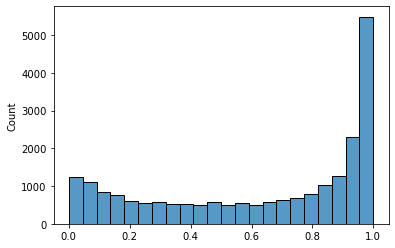

In [100]:
psi_global = []
p = 0
ijc = 0
sjc = 0
for i in data.index:
    for j in (12, 13, 14, 15):
        if p == 0:
            ijc += sum(data[data.columns[j]][i])
            p = abs(p-1)
        else:
            sjc += sum(data[data.columns[j]][i])
            p = abs(p-1)
    psi_global.append(ijc / (ijc+sjc))
    p = 0
    ijc = 0
    sjc = 0
sbn.histplot(psi_global)


In [7]:
data2 = pd.read_excel("10_4_v6_filth.xlsx")
data2

,GeneID,id1,id2,pvalue,r,exonstart1,exonend1,exonstart2,exonend2,num1,num2,psi1/psi2,psi1,psi2,en,genenum1,genenum2
0,Ablim2,15863,15862,1.268632e-08,0.881569,80088714,80088747,80084992,80085091,1_12,1_14,0.874765,0.688525,0.787097,0.361992,15,12
1,Ablim2,15865,15863,1.050776e-06,0.817970,80096458,80096515,80088714,80088747,1_9,1_12,1.088103,0.749186,0.688525,0.404654,18,15
2,Ablim2,15865,15862,1.838186e-07,0.846635,80096458,80096515,80084992,80085091,1_9,1_14,0.951834,0.749186,0.787097,0.337153,18,12
3,Add1,13283,13280,1.933382e-07,0.845877,81379096,81379189,81370603,81370637,5_13,5_16,0.662988,0.237996,0.358974,0.600881,6,3
4,Adgrl3,3813,3812,7.048083e-08,0.860284,28836314,28836518,28662398,28662413,5_2,6_5,0.991379,0.833333,0.840580,0.244936,29,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Usp54,20388,20386,8.173752e-06,0.776461,4174423,4174619,4156886,4157057,1_18,1_11,0.964049,0.766562,0.795148,0.340959,19,12
225,Wnk2,14710,14708,2.235318e-07,0.843677,16017846,16017945,16016864,16017035,1_24,1_23,0.873699,0.680672,0.779070,0.383403,26,25
226,Ythdc1,13506,13505,3.947684e-05,-0.737323,22997105,22997532,22987390,22987444,2_6,6_6,0.137839,0.120235,0.872283,0.633405,10,12
227,Ythdf3,20087,20086,1.144638e-11,0.938922,100683696,100681302,100678085,100681302,1_3,1_2,1.847769,0.251969,0.136364,0.487175,3,2


In [20]:
Genes = sorted(list(set(data["GeneID"])))
Genes2 = sorted(list(set(data2["GeneID"])))
en = dict.fromkeys(Genes, 0)
n_en = dict.fromkeys(Genes, 0)
norm_en = dict.fromkeys(Genes, 0)
st1 = data2['exonstart1'].tolist()
st2 = data2['exonstart2'].tolist()
a = (5, 6, 7, 8, 10, 11, 12, 13)
for j in Genes:
    for i in data.loc[data["GeneID"] == j]['exonstart'].index:
        lst = [] 
        for k in a[::2]:
            lst += data[data.columns[k]][i]
        psi = np.sum(lst) / sum(data['IJC_SJC'][i])
        en[j] += -psi * np.log2(psi)
        if (not data.loc[data["GeneID"] == j]['exonstart'][i] in st1) and (not data.loc[data["GeneID"] == j]['exonstart'][i] in st2):
            n_en[j] += -psi * np.log2(psi)
    if j in Genes2:
        for i in data2.loc[data2['GeneID'] == j]['en']:
            n_en[j] += i
        
for j in Genes:
    n = len(list(data.loc[data["GeneID"] == j]['exonstart'].index))
    norm_en[j] = n_en[j] if n == 1 else n_en[j] / np.log2(n)
for i in en.keys():
    print(i, en[i], n_en[i], len(list(data.loc[data["GeneID"] == i]['exonstart'].index)), norm_en[i], sep ='	')

Aaas	0.016300757756880658	0.016300757756880658	1	0.016300757756880658
Aaed1	0.1379343530927877	0.1379343530927877	1	0.1379343530927877
Aagab	0.020831294082759088	0.020831294082759088	1	0.020831294082759088
Aak1	0.013871526032585737	0.013871526032585737	1	0.013871526032585737
Aamdc	0.5851937753615057	0.5851937753615057	2	0.5851937753615057
Aar2	0.05440723881381483	0.05440723881381483	1	0.05440723881381483
Aars	0.25628064394773215	0.25628064394773215	3	0.1616950835310771
Aars2	0.03795428810610721	0.03795428810610721	1	0.03795428810610721
Aasdh	0.16581562547947176	0.16581562547947176	2	0.16581562547947176
Aatk	0.013577798433169332	0.013577798433169332	1	0.013577798433169332
Abca2	0.5154612740135425	0.5154612740135425	3	0.3252198545889939
Abca3	0.5295662411247739	0.5295662411247739	1	0.5295662411247739
Abca4	0.08729006661701387	0.08729006661701387	1	0.08729006661701387
Abca7	0.021162293015223158	0.021162293015223158	1	0.021162293015223158
Abca8a	0.12287989711783666	0.12287989711783666	5	0.

Adrm1	0.003167271426363085	0.003167271426363085	1	0.003167271426363085
Adsl	0.05183665095933889	0.05183665095933889	1	0.05183665095933889
Adss	0.01023166313628128	0.01023166313628128	1	0.01023166313628128
Aes	0.0008438320539974149	0.0008438320539974149	2	0.0008438320539974149
Afap1	0.5030881475107787	0.5030881475107787	1	0.5030881475107787
Afap1l2	1.0608303942744026	1.0608303942744026	2	1.0608303942744026
Afdn	0.7133716670037432	0.7133716670037432	2	0.7133716670037432
Aff3	0.77986859748567	0.77986859748567	3	0.4920423020297519
Aff4	0.19573451581059567	0.19573451581059567	1	0.19573451581059567
Afg3l1	0.016774563064488816	0.016774563064488816	1	0.016774563064488816
Afmid	0.28199895063255087	0.28199895063255087	1	0.28199895063255087
Aftph	0.4782757288480232	0.4782757288480232	4	0.2391378644240116
Aga	0.5158564447852251	0.5158564447852251	2	0.5158564447852251
Agap1	1.058310032311838	1.058310032311838	5	0.4557893220906038
Agap2	0.02825117660301139	0.02825117660301139	1	0.02825117660301139
A

Anxa4	0.39104110404661596	0.39104110404661596	1	0.39104110404661596
Anxa5	0.003390579811366375	0.003390579811366375	1	0.003390579811366375
Anxa6	0.13623899729741512	0.13623899729741512	2	0.13623899729741512
Anxa7	0.4997872943307193	0.4997872943307193	2	0.4997872943307193
Ap1ar	0.5047756734531201	0.5047756734531201	2	0.5047756734531201
Ap1b1	0.38870168289527157	0.44085473966317457	3	0.27814837225649575
Ap1g2	0.5222581889239234	0.5222581889239234	2	0.5222581889239234
Ap1s2	0.2647355980129336	0.2647355980129336	1	0.2647355980129336
Ap1s3	1.0082689707457129	1.0082689707457129	2	1.0082689707457129
Ap2a1	0.13400763441460814	0.13400763441460814	1	0.13400763441460814
Ap2m1	0.025003529982783282	0.025003529982783282	2	0.025003529982783282
Ap2s1	0.008165794389457312	0.008165794389457312	2	0.008165794389457312
Ap3b1	0.36552253903469023	0.36552253903469023	1	0.36552253903469023
Ap3b2	0.005898467854278108	0.005898467854278108	2	0.005898467854278108
Ap3d1	0.006648577198912365	0.006648577198912365	2	0

Atg10	0.7108888878940334	0.7108888878940334	2	0.7108888878940334
Atg101	1.0172745090714375	1.0172745090714375	2	1.0172745090714375
Atg13	0.006621107707542621	0.006621107707542621	2	0.006621107707542621
Atg16l1	0.43129665453241456	0.43129665453241456	3	0.27211789196033037
Atg16l2	1.147073748055799	1.147073748055799	3	0.7237229571891334
Atg4b	0.171041453153002	0.171041453153002	1	0.171041453153002
Atg4c	0.042045554987648	0.042045554987648	1	0.042045554987648
Atg9a	0.5879376532880434	0.5879376532880434	4	0.2939688266440217
Atic	0.007366872785462559	0.007366872785462559	1	0.007366872785462559
Atl1	0.0396433868355109	0.0396433868355109	2	0.0396433868355109
Atl2	0.5057215970441366	0.5057215970441366	1	0.5057215970441366
Atmin	0.27823735173849634	0.27823735173849634	1	0.27823735173849634
Atp11a	0.4689931983751214	0.4689931983751214	1	0.4689931983751214
Atp11c	0.8962835263708202	0.8962835263708202	3	0.5654919444232985
Atp13a1	0.024244053315044173	0.024244053315044173	1	0.024244053315044173
Atp

Bptf	0.020035788793867207	0.020035788793867207	1	0.020035788793867207
Braf	0.9294821529293086	0.9294821529293086	2	0.9294821529293086
Brat1	0.558661157910774	0.558661157910774	3	0.35247594669058974
Brd3	0.39104110404661596	0.39104110404661596	1	0.39104110404661596
Brd4	0.008303165280351393	0.008303165280351393	1	0.008303165280351393
Brd8	0.28732968400165104	0.28732968400165104	2	0.28732968400165104
Bre	0.045190918317277215	0.045190918317277215	2	0.045190918317277215
Brinp1	0.0031812394905815075	0.0031812394905815075	1	0.0031812394905815075
Brpf3	0.1906773681453284	0.1906773681453284	3	0.12030402489558613
Brsk1	0.0067908039716386105	0.0067908039716386105	3	0.004284520276378023
Brsk2	0.29748075455189066	0.29748075455189066	2	0.29748075455189066
Bscl2	0.015870419758066027	0.015870419758066027	1	0.015870419758066027
Bsg	0.06693406921163093	0.06693406921163093	2	0.06693406921163093
Bsn	0.025757640648596078	0.025757640648596078	3	0.01625126186700088
Btbd1	0.0020377031628526173	0.002037703162

Ccdc163	0.3449562589045963	0.3449562589045963	2	0.3449562589045963
Ccdc17	0.23686905043226034	0.23686905043226034	1	0.23686905043226034
Ccdc171	0.1801900285978673	0.1801900285978673	2	0.1801900285978673
Ccdc18	0.1306384893984915	0.1306384893984915	1	0.1306384893984915
Ccdc180	0.3505563015589772	0.3505563015589772	2	0.3505563015589772
Ccdc25	0.265546632742192	0.265546632742192	1	0.265546632742192
Ccdc30	0.25069941506545623	0.25069941506545623	5	0.10797036119140364
Ccdc50	0.2719539230041146	0.2719539230041146	1	0.2719539230041146
Ccdc57	0.4761418935311354	0.4761418935311354	2	0.4761418935311354
Ccdc62	0.07231169538010301	0.07231169538010301	1	0.07231169538010301
Ccdc66	0.6550942242605011	0.6550942242605011	3	0.41331843747876307
Ccdc82	0.05440723881381483	0.05440723881381483	1	0.05440723881381483
Ccdc84	0.052115721707323544	0.052115721707323544	1	0.052115721707323544
Ccdc85a	0.4454408600372891	0.4454408600372891	2	0.4454408600372891
Ccdc85c	0.5246266395200335	0.5246266395200335	1	0.524626

Chd8	0.02367574503830914	0.02367574503830914	1	0.02367574503830914
Chek2	0.48736811502959115	0.48736811502959115	1	0.48736811502959115
Cherp	0.008279340504783348	0.008279340504783348	1	0.008279340504783348
Chgb	0.19825878113865897	0.19825878113865897	1	0.19825878113865897
Chi3l1	0.012938529827018942	0.012938529827018942	1	0.012938529827018942
Chka	1.1951958800695959	1.1951958800695959	3	0.7540846420819314
Chl1	0.6498708056697229	0.6498708056697229	2	0.6498708056697229
Chm	0.04806649163109624	0.04806649163109624	1	0.04806649163109624
Chmp2b	0.011140222435476976	0.011140222435476976	1	0.011140222435476976
Chmp3	0.024785450536819395	0.024785450536819395	1	0.024785450536819395
Chmp5	0.0016301630194080386	0.0016301630194080386	1	0.0016301630194080386
Chn1	0.023499595050860272	0.023499595050860272	5	0.010120724712623045
Chpf	0.3350379415806105	0.3350379415806105	1	0.3350379415806105
Chpt1	0.4520716554443402	0.4520716554443402	2	0.4520716554443402
Chrd	0.592091996659628	0.592091996659628	7	0.

Cpne5	0.5803647963279792	0.5803647963279792	2	0.5803647963279792
Cpne6	0.012183215765292424	0.012183215765292424	1	0.012183215765292424
Cpne7	0.013128722442671076	0.013128722442671076	1	0.013128722442671076
Cpne8	0.1269955311227168	0.1269955311227168	1	0.1269955311227168
Cpne9	0.16873428421806447	0.16873428421806447	2	0.16873428421806447
Cpsf3l	0.2213097989478336	0.2213097989478336	3	0.13963093691310544
Cpsf6	0.29690002822161876	0.29690002822161876	1	0.29690002822161876
Cpsf7	1.2533933288946555	1.7292753916544965	3	1.0910512967137571
Cpt1c	0.007876307475273233	0.007876307475273233	1	0.007876307475273233
Cptp	0.13015928982252423	0.13015928982252423	2	0.13015928982252423
Cr1l	0.03341378450968062	0.03341378450968062	1	0.03341378450968062
Crat	0.12497433958278201	0.12497433958278201	1	0.12497433958278201
Crbn	0.24416333352166042	0.24416333352166042	1	0.24416333352166042
Creb1	0.08231796823561358	0.08231796823561358	1	0.08231796823561358
Creb3	0.021143498093466228	0.021143498093466228	1	0.0

Ddr1	0.24591002586642033	0.24591002586642033	1	0.24591002586642033
Ddx1	0.011766100000534345	0.011766100000534345	1	0.011766100000534345
Ddx19a	0.47530932872923476	0.47530932872923476	1	0.47530932872923476
Ddx19b	0.3594781404715311	0.3594781404715311	1	0.3594781404715311
Ddx20	0.041205258600964856	0.041205258600964856	1	0.041205258600964856
Ddx21	0.01748612366353875	0.01748612366353875	1	0.01748612366353875
Ddx25	0.009780794215147538	0.009780794215147538	1	0.009780794215147538
Ddx27	0.019044070165461977	0.019044070165461977	1	0.019044070165461977
Ddx3	0.33879532145854796	0.33879532145854796	3	0.21375604867900438
Ddx31	0.5841706470714452	0.5841706470714452	2	0.5841706470714452
Ddx42	0.02367574503830914	0.02367574503830914	1	0.02367574503830914
Ddx55	0.020035788793867207	0.020035788793867207	1	0.020035788793867207
Deaf1	0.2000260775292126	0.2000260775292126	3	0.12620240380337133
Dedd	1.0174448799400309	1.631415412587256	3	1.029308524236355
Dek	0.0035887843486825783	0.0035887843486825783	

Drg2	0.006757291645443512	0.006757291645443512	1	0.006757291645443512
Drosha	0.010440185392847285	0.010440185392847285	2	0.010440185392847285
Drp2	0.052980991660070385	0.052980991660070385	1	0.052980991660070385
Dscr3	0.02271720655569148	0.02271720655569148	1	0.02271720655569148
Dst	1.1083394702110527	1.1083394702110527	5	0.4773358282073842
Dtna	0.9994555335774153	0.9994555335774153	2	0.9994555335774153
Dtnb	2.0449531956912583	2.603588890665388	6	1.0072056712385713
Dtx2	0.5153353475101474	0.5153353475101474	1	0.5153353475101474
Dtx3	0.07335337791611271	0.07335337791611271	2	0.07335337791611271
Dtymk	0.38997500048077083	0.38997500048077083	1	0.38997500048077083
Dus2	0.31800229823331577	0.31800229823331577	4	0.15900114911665789
Dus4l	0.48220555587606945	0.48220555587606945	1	0.48220555587606945
Dusp15	0.1306720001126362	0.1306720001126362	1	0.1306720001126362
Dusp22	0.03539436203732569	0.03539436203732569	1	0.03539436203732569
Dusp3	0.012304057893113465	0.012304057893113465	1	0.012304057

Entpd4	0.006842757757684617	0.006842757757684617	1	0.006842757757684617
Entpd5	0.034965562162753504	0.034965562162753504	1	0.034965562162753504
Entpd6	0.005274906630430557	0.005274906630430557	1	0.005274906630430557
Eny2	0.015489381714646274	0.015489381714646274	1	0.015489381714646274
Eogt	0.35918651863083756	0.35918651863083756	2	0.35918651863083756
Ep400	1.8049191517862022	1.8049191517862022	5	0.7773363678920296
Epb41	1.9573522377006032	1.9573522377006032	6	0.7572072079012901
Epb41l1	0.08086920721416907	0.08086920721416907	3	0.05102278897915482
Epb41l2	2.315194515946524	2.7536802456913954	8	0.9178934152304651
Epb41l3	0.83381167624846	0.83381167624846	6	0.3225623876616555
Epb41l4a	0.13406999270781444	0.13406999270781444	2	0.13406999270781444
Epb41l4b	0.5031429265096046	0.5031429265096046	2	0.5031429265096046
Epc2	0.5163871205878868	0.5163871205878868	1	0.5163871205878868
Epdr1	0.011972225364736846	0.011972225364736846	1	0.011972225364736846
Epha4	0.02397548557734538	0.0239754855773453

Fam35a	0.3964045673961992	0.3964045673961992	2	0.3964045673961992
Fam3a	0.5794737687267995	0.5794737687267995	3	0.3656072421039233
Fam3c	0.029468579235063706	0.029468579235063706	2	0.029468579235063706
Fam45a	0.2308928131282191	0.2308928131282191	1	0.2308928131282191
Fam47e	0.1306384893984915	0.1306384893984915	1	0.1306384893984915
Fam49a	0.0183596615805834	0.0183596615805834	2	0.0183596615805834
Fam49b	0.49518470881885346	0.49518470881885346	4	0.24759235440942673
Fam53a	0.13538347381989263	0.13538347381989263	1	0.13538347381989263
Fam53c	0.020876505839744278	0.020876505839744278	1	0.020876505839744278
Fam65b	0.3696841653603044	0.3696841653603044	3	0.2332447393500468
Fam71e1	0.2940702536450188	0.2940702536450188	2	0.2940702536450188
Fam76a	0.04370056985073687	0.04370056985073687	1	0.04370056985073687
Fam76b	0.9270397930455013	0.9270397930455013	2	0.9270397930455013
Fam81a	0.00577651791547978	0.00577651791547978	1	0.00577651791547978
Fam8a1	0.0197613704332824	0.0197613704332824	1	0.0197

Fubp1	0.5307079957191532	0.5307079957191532	1	0.5307079957191532
Fubp3	0.2799554670141082	0.2799554670141082	3	0.17663223381419357
Fundc2	0.5278962643501312	0.5278962643501312	2	0.5278962643501312
Furin	0.012732988779401275	0.012732988779401275	1	0.012732988779401275
Fus	0.06473138946017966	0.06473138946017966	1	0.06473138946017966
Fut8	0.0800397013635856	0.0800397013635856	2	0.0800397013635856
Fuz	0.02894540516237989	0.02894540516237989	1	0.02894540516237989
Fv1	1.0331223605933	1.0331223605933	3	0.6518276363782932
Fxn	0.007037466530389338	0.007037466530389338	1	0.007037466530389338
Fxyd1	0.659856782955104	0.659856782955104	5	0.2841848481044862
Fxyd6	0.02953171882935194	0.02953171882935194	2	0.02953171882935194
Fxyd7	0.06322731990046143	0.06322731990046143	4	0.031613659950230716
Fyn	0.09282759605014365	0.09282759605014365	2	0.09282759605014365
Fzd6	0.05766707437889454	0.05766707437889454	1	0.05766707437889454
G3bp2	0.18206286574450103	0.18206286574450103	2	0.18206286574450103
G6pd	0.00

Gpr107	0.021498818977885838	0.021498818977885838	2	0.021498818977885838
Gpr108	0.05936058650071867	0.05936058650071867	1	0.05936058650071867
Gpr146	0.4361692313526532	0.4361692313526532	1	0.4361692313526532
Gpr161	0.3785097007321707	0.3785097007321707	1	0.3785097007321707
Gpr19	0.26045937304056793	0.26045937304056793	1	0.26045937304056793
Gpr85	0.514998694185101	0.514998694185101	1	0.514998694185101
Gprc5b	0.001277851699470216	0.001277851699470216	1	0.001277851699470216
Gpsm1	0.0853316491646269	0.0853316491646269	2	0.0853316491646269
Gpsm2	0.22289639208942794	0.22289639208942794	1	0.22289639208942794
Gpx8	0.043985958921544895	0.043985958921544895	1	0.043985958921544895
Gramd1a	0.5369508151222955	0.5369508151222955	2	0.5369508151222955
Gramd1b	0.7908117044698741	0.7908117044698741	3	0.49894663382260196
Gramd3	0.009747752268806887	0.009747752268806887	1	0.009747752268806887
Grasp	0.02909505702921244	0.02909505702921244	1	0.02909505702921244
Grb10	0.6874421728174994	0.6874421728174994	2	0

Hmgn3	0.5816870448193159	0.5816870448193159	3	0.3670036638435603
Hmgxb3	0.014898072237283004	0.014898072237283004	1	0.014898072237283004
Hmgxb4	0.8454486008054556	0.8454486008054556	2	0.8454486008054556
Hnrnpa2b1	0.021647371482364904	0.021647371482364904	1	0.021647371482364904
Hnrnpa3	0.006527975813445058	0.006527975813445058	1	0.006527975813445058
Hnrnpd	0.8564126590786849	0.608337768752528	3	0.38381839852724275
Hnrnpdl	0.5592179224552585	0.5592179224552585	3	0.35282722600743865
Hnrnph1	0.0554790529386974	0.0554790529386974	2	0.0554790529386974
Hnrnph2	0.026737405729879204	0.026737405729879204	1	0.026737405729879204
Hnrnpk	0.6983904450142576	0.6983904450142576	2	0.6983904450142576
Hnrnpm	0.07740042085690318	0.07740042085690318	2	0.07740042085690318
Hnrnpu	0.0014033992911386128	0.0014033992911386128	1	0.0014033992911386128
Hnrnpul1	0.012619365338131417	0.012619365338131417	2	0.012619365338131417
Hnrnpul2	0.021712358542112058	0.021712358542112058	1	0.021712358542112058
Hoga1	0.082317968

Iqsec2	0.2832315175600216	0.2832315175600216	2	0.2832315175600216
Iqsec3	0.8551081736857215	0.8551081736857215	4	0.4275540868428607
Irak1	0.1278011576314535	0.1278011576314535	2	0.1278011576314535
Irf2	0.041629743020656654	0.041629743020656654	1	0.041629743020656654
Irf3	0.479479377598911	0.479479377598911	2	0.479479377598911
Irf7	0.01727673484054183	0.01727673484054183	1	0.01727673484054183
Irf9	0.022598603994206334	0.022598603994206334	1	0.022598603994206334
Irgm	0.8922572141380339	0.8922572141380339	2	0.8922572141380339
Isoc2b	0.2910101132146062	0.2910101132146062	2	0.2910101132146062
Ist1	0.16013025785731544	0.16013025785731544	3	0.10103094412924997
Itfg2	0.4726626231238519	0.4726626231238519	2	0.4726626231238519
Itga3	0.4320393842577567	0.4320393842577567	1	0.4320393842577567
Itga6	0.272440402671864	0.272440402671864	1	0.272440402671864
Itgb1bp1	0.3914942620864452	0.3914942620864452	3	0.24700537830284047
Itgb3bp	1.5294094140299732	1.5294094140299732	4	0.7647047070149866
Itgb4	0.30

Klhl29	0.1769116846305765	0.1769116846305765	2	0.1769116846305765
Klhl3	0.06782452976404735	0.06782452976404735	1	0.06782452976404735
Klhl32	0.19673892332858883	0.19673892332858883	2	0.19673892332858883
Klhl5	0.007386990103260834	0.007386990103260834	1	0.007386990103260834
Klk6	0.02696223196131254	0.02696223196131254	1	0.02696223196131254
Klk8	0.23195432115157735	0.23195432115157735	1	0.23195432115157735
Kmt2b	0.0250871080350826	0.0250871080350826	1	0.0250871080350826
Kmt2d	0.3229892616512404	0.3229892616512404	3	0.20378353525984413
Kmt2e	0.44902621558271427	0.44902621558271427	3	0.28330399954472607
Kmt5b	0.04858494717935398	0.04858494717935398	2	0.04858494717935398
Kmt5c	1.1014277173452067	1.1014277173452067	3	0.6949235182813842
Kpna5	0.04304884301425784	0.04304884301425784	1	0.04304884301425784
Kras	0.21837247077522684	0.21837247077522684	1	0.21837247077522684
Krcc1	0.08984333818228273	0.08984333818228273	1	0.08984333818228273
Kremen1	0.041205258600964856	0.041205258600964856	1	0.041

LOC103692025	0.4066429193099067	0.4066429193099067	2	0.4066429193099067
LOC103692469	0.28199895063255087	0.28199895063255087	1	0.28199895063255087
LOC103692937	0.38997500048077083	0.38997500048077083	1	0.38997500048077083
LOC103693260	0.14598101096685656	0.14598101096685656	1	0.14598101096685656
LOC103693373	0.27823735173849634	0.27823735173849634	1	0.27823735173849634
LOC103695056	0.2552630927011431	0.2552630927011431	1	0.2552630927011431
LOC108348046	0.0041337824806307235	0.0041337824806307235	1	0.0041337824806307235
LOC108348101	0.287430418889922	0.287430418889922	1	0.287430418889922
LOC108348125	0.5287712379549449	0.5287712379549449	1	0.5287712379549449
LOC108348147	0.006360102654907322	0.006360102654907322	1	0.006360102654907322
LOC108348153	0.5039045401227665	0.5039045401227665	1	0.5039045401227665
LOC108348590	0.5112188503407658	0.5112188503407658	1	0.5112188503407658
LOC108348837	0.530702406777199	0.530702406777199	1	0.530702406777199
LOC108349244	0.3602012209808308	0.360201220

Lrfn1	0.21466749444873426	0.21466749444873426	1	0.21466749444873426
Lrfn2	0.4361692313526532	0.4361692313526532	1	0.4361692313526532
Lrfn5	0.6683614194274046	0.6683614194274046	4	0.3341807097137023
Lrif1	0.5271032608440674	0.5271032608440674	1	0.5271032608440674
Lrp1	0.09278172461000454	0.09278172461000454	2	0.09278172461000454
Lrp11	0.20545204950797735	0.20545204950797735	2	0.20545204950797735
Lrp12	0.07699156177083931	0.07699156177083931	1	0.07699156177083931
Lrp1b	0.18114885676017273	0.18114885676017273	1	0.18114885676017273
Lrp3	0.5	0.5	1	0.5
Lrp4	0.20046305590943644	0.20046305590943644	1	0.20046305590943644
Lrp8	1.5062159197540101	1.7689171155978787	5	0.7618311348628087
Lrpap1	0.0048331265081696835	0.0048331265081696835	1	0.0048331265081696835
Lrpprc	0.006134730430821796	0.006134730430821796	1	0.006134730430821796
Lrrc14	1.0228258514149018	1.0228258514149018	2	1.0228258514149018
Lrrc27	0.19062207543124116	0.19062207543124116	1	0.19062207543124116
Lrrc28	0.06350012296767674	0.06350

Mnat1	0.013849333331819836	0.013849333331819836	1	0.013849333331819836
Mnt	0.018032493104769502	0.018032493104769502	1	0.018032493104769502
Mobp	0.5304661216844129	0.5304661216844129	4	0.26523306084220644
Mocs2	0.4568919934167204	0.4568919934167204	2	0.4568919934167204
Mog	0.010989367810571615	0.010989367810571615	1	0.010989367810571615
Mogat1	0.5	0.5	1	0.5
Mok	2.757922126065181	2.757922126065181	8	0.9193073753550604
Mon1a	0.01623959831409489	0.01623959831409489	1	0.01623959831409489
Mon1b	0.07894480628370351	0.07894480628370351	1	0.07894480628370351
Morc2	0.008267479314233604	0.008267479314233604	1	0.008267479314233604
Morc3	0.14239931258607955	0.14239931258607955	1	0.14239931258607955
Morf4l1	0.004013046930497382	0.004013046930497382	1	0.004013046930497382
Morf4l2	0.34801636001636677	0.34801636001636677	1	0.34801636001636677
Morn1	0.4679204741212062	0.4679204741212062	3	0.29522494942833216
Morn4	0.007071963219103954	0.007071963219103954	1	0.007071963219103954
Mospd1	0.405290208240138

Nab2	0.1822148200788064	0.1822148200788064	1	0.1822148200788064
Nabp2	0.002632651521988805	0.002632651521988805	1	0.002632651521988805
Naca	0.10028332842693247	0.10028332842693247	2	0.10028332842693247
Nacad	0.0070203440825653335	0.0070203440825653335	1	0.0070203440825653335
Nacc1	0.008180420342136554	0.008180420342136554	1	0.008180420342136554
Nadk	0.14625345293023204	0.14625345293023204	1	0.14625345293023204
Nadk2	0.9220427891930774	0.9220427891930774	3	0.5817442297679276
Nadsyn1	0.1065943545414793	0.1065943545414793	1	0.1065943545414793
Nae1	0.014259988321076856	0.014259988321076856	1	0.014259988321076856
Nagk	0.11909230350546976	0.11909230350546976	3	0.07513887770296326
Nalcn	0.14010697607961192	0.14010697607961192	1	0.14010697607961192
Nans	0.007267907690792826	0.007267907690792826	1	0.007267907690792826
Nap1l1	0.27263975957600844	0.27263975957600844	2	0.27263975957600844
Nap1l4	0.7165230948817956	0.7165230948817956	3	0.4520757396820293
Napa	0.01587432018772202	0.01587432018772202

Npas1	0.042106888979650876	0.042106888979650876	1	0.042106888979650876
Npas2	0.04348114693372184	0.04348114693372184	1	0.04348114693372184
Npas3	0.22479310379155526	0.22479310379155526	1	0.22479310379155526
Npdc1	0.02684483132935308	0.02684483132935308	1	0.02684483132935308
Npepps	0.18461846389958092	0.18461846389958092	3	0.11648128193290361
Nphp4	0.36279386286665855	0.36279386286665855	2	0.36279386286665855
Nploc4	0.02738084253875077	0.02738084253875077	1	0.02738084253875077
Npnt	0.46134566974720237	0.46134566974720237	1	0.46134566974720237
Npr2	0.23799546905911703	0.23799546905911703	1	0.23799546905911703
Nprl2	0.009367983519800926	0.009367983519800926	1	0.009367983519800926
Nprl3	0.55813298245512	0.55813298245512	2	0.55813298245512
Nptn	0.49816776131906815	0.49816776131906815	3	0.3143088628862843
Npy5r	0.5217822215997981	0.5217822215997981	1	0.5217822215997981
Nqo2	0.10354266514023325	0.10354266514023325	1	0.10354266514023325
Nr2c1	0.5925936248959184	0.5925936248959184	2	0.592593624

Pank1	0.16561163057859057	0.16561163057859057	1	0.16561163057859057
Pank2	0.3825556853903327	0.3825556853903327	3	0.24136576431068263
Panx1	0.024380605926699283	0.024380605926699283	1	0.024380605926699283
Papd4	0.5414408477968868	0.5414408477968868	2	0.5414408477968868
Papd7	0.012823528424395436	0.012823528424395436	1	0.012823528424395436
Papola	0.5399665519583216	0.5399665519583216	2	0.5399665519583216
Paqr6	0.389036980614017	0.389036980614017	1	0.389036980614017
Paqr7	0.08420280622629334	0.08420280622629334	1	0.08420280622629334
Paqr8	0.2696410579483439	0.2696410579483439	1	0.2696410579483439
Pard3	0.5893566013874618	0.5893566013874618	2	0.5893566013874618
Parg	0.01064695172940619	0.01064695172940619	1	0.01064695172940619
Parl	0.01695194655869979	0.01695194655869979	1	0.01695194655869979
Parm1	0.032905823342682036	0.032905823342682036	1	0.032905823342682036
Parn	0.06350012296767674	0.06350012296767674	1	0.06350012296767674
Parp11	0.1803654013222899	0.1803654013222899	2	0.180365401322

Pias1	0.042892126865703706	0.042892126865703706	2	0.042892126865703706
Pias2	0.011556657113679605	0.011556657113679605	1	0.011556657113679605
Pias4	0.01526589120184416	0.01526589120184416	1	0.01526589120184416
Picalm	1.8608883734624257	1.6535327389838121	5	0.7121377886872184
Pick1	0.011972225364736846	0.011972225364736846	1	0.011972225364736846
Piezo2	0.5850701226426631	0.5850701226426631	2	0.5850701226426631
Pigf	0.6737127875833273	0.6737127875833273	3	0.4250654430478884
Pigk	0.007136093474640272	0.007136093474640272	1	0.007136093474640272
Pigl	0.0963733074483998	0.0963733074483998	2	0.0963733074483998
Pign	0.4154522643293988	0.4154522643293988	1	0.4154522643293988
Pigq	0.021830213551254453	0.021830213551254453	2	0.021830213551254453
Pigs	0.006773153538502138	0.006773153538502138	1	0.006773153538502138
Pigu	0.02371280214802068	0.02371280214802068	1	0.02371280214802068
Pigv	0.8176446888816218	0.8176446888816218	2	0.8176446888816218
Pih1d1	0.08729006661701387	0.08729006661701387	1	0.087

Pou2f2	0.8372046558387948	0.8372046558387948	2	0.8372046558387948
Ppa2	0.015145698668715563	0.015145698668715563	1	0.015145698668715563
Ppara	0.5112188503407658	0.5112188503407658	1	0.5112188503407658
Ppcdc	0.5210896782498619	0.5210896782498619	1	0.5210896782498619
Ppfia1	0.9340603889582864	0.9340603889582864	2	0.9340603889582864
Ppfia2	0.37512518704676423	0.37512518704676423	4	0.18756259352338212
Ppfia3	0.0349463179204278	0.0349463179204278	1	0.0349463179204278
Ppfia4	0.41718097320868563	0.41718097320868563	1	0.41718097320868563
Ppfibp1	1.5566096208646036	1.2470912849577336	4	0.6235456424788668
Ppfibp2	0.444070082695216	0.444070082695216	2	0.444070082695216
Pphln1	1.5724954674173184	1.5724954674173184	5	0.6772369354933021
Ppib	0.001679504336319407	0.001679504336319407	1	0.001679504336319407
Ppie	0.022539765856376744	0.022539765856376744	1	0.022539765856376744
Ppig	0.8426199022794387	0.8426199022794387	2	0.8426199022794387
Ppil4	0.04187305437107812	0.04187305437107812	2	0.0418730543710

Psmd9	0.013674315720030139	0.013674315720030139	1	0.013674315720030139
Psme3	0.020534815196131023	0.020534815196131023	1	0.020534815196131023
Psmg3	0.007417372934928434	0.007417372934928434	1	0.007417372934928434
Psmg4	0.020982766958638807	0.020982766958638807	1	0.020982766958638807
Pstk	0.12265105401900918	0.12265105401900918	1	0.12265105401900918
Pstpip2	0.04888034641238285	0.04888034641238285	1	0.04888034641238285
Ptbp1	0.5324297136285139	0.5324297136285139	2	0.5324297136285139
Ptbp2	0.030371396289344446	0.030371396289344446	2	0.030371396289344446
Ptbp3	0.6042241031826049	0.6042241031826049	2	0.6042241031826049
Ptcd2	0.3985343154163392	0.3985343154163392	1	0.3985343154163392
Ptdss2	0.10772219118109687	0.10772219118109687	2	0.10772219118109687
Ptgr2	0.006935966598866651	0.006935966598866651	1	0.006935966598866651
Ptk2	1.382947804639945	1.382947804639945	7	0.4926159474080094
Ptk2b	0.023255406475575315	0.023255406475575315	5	0.010015558417498474
Ptp4a2	0.004027450594249999	0.0040274505

RGD1563323	0.6667858750341311	0.6667858750341311	2	0.6667858750341311
RGD1563349	0.030050548860328673	0.030050548860328673	1	0.030050548860328673
RGD1564036	0.14598101096685656	0.14598101096685656	1	0.14598101096685656
RGD1564053	0.3223341283353674	0.3223341283353674	1	0.3223341283353674
RGD1564450	0.07688493192889424	0.07688493192889424	2	0.07688493192889424
RGD1564541	0.08231796823561358	0.08231796823561358	1	0.08231796823561358
RGD1564804	0.07079279024595059	0.07079279024595059	1	0.07079279024595059
RGD1565059	0.27823735173849634	0.27823735173849634	1	0.27823735173849634
RGD1565367	0.2087810639524931	0.2087810639524931	1	0.2087810639524931
RGD1565536	0.15507679723716658	0.15507679723716658	1	0.15507679723716658
RGD1565616	0.0448392013107539	0.0448392013107539	2	0.0448392013107539
RGD1565866	0.1150699752435374	0.1150699752435374	1	0.1150699752435374
RGD1566029	0.3894537225497003	0.3894537225497003	1	0.3894537225497003
RGD1566251	0.2813524871368452	0.2813524871368452	1	0.2813524871368

Rce1	0.33347671694494185	0.33347671694494185	3	0.21040038284389084
Rchy1	0.009087691190132353	0.009087691190132353	1	0.009087691190132353
Rcsd1	0.4298218689351467	0.4298218689351467	1	0.4298218689351467
Rdh13	0.06069740680220848	0.06069740680220848	1	0.06069740680220848
Reck	0.04392221760713494	0.04392221760713494	1	0.04392221760713494
Recql	0.1320283760778291	0	2	0.0
Reep1	0.02336087048244386	0.02336087048244386	1	0.02336087048244386
Reep5	0.0007939982711460731	0.0007939982711460731	1	0.0007939982711460731
Reep6	0.13843528652837822	0.13843528652837822	1	0.13843528652837822
Rell2	0.2341576984432176	0.2341576984432176	2	0.2341576984432176
Reln	0.12775904413381714	0.12775904413381714	1	0.12775904413381714
Relt	0.2001226220078741	0.2001226220078741	1	0.2001226220078741
Repin1	0.2273727625151816	0.2273727625151816	2	0.2273727625151816
Reps1	0.20213561873552044	0.20213561873552044	1	0.20213561873552044
Rere	0.12527239544308091	0.12527239544308091	3	0.07903808158620922
Ret	0.0144988287324376

Rps6ka3	0.8395989580328516	0.8395989580328516	2	0.8395989580328516
Rps6ka4	0.024082195558446456	0.024082195558446456	1	0.024082195558446456
Rps6ka5	0.0675601283291447	0.0675601283291447	1	0.0675601283291447
Rps6kb1	0.564228923541856	0.564228923541856	2	0.564228923541856
Rps6kb2	0.13747172139865416	0.13747172139865416	2	0.13747172139865416
Rps6kc1	0.32532847103675283	0.32532847103675283	4	0.16266423551837642
Rps6kl1	0.01414349471554565	0.01414349471554565	1	0.01414349471554565
Rpsa	0.0032156016438194238	0.0032156016438194238	1	0.0032156016438194238
Rpusd1	0.9115971670709614	0.9115971670709614	3	0.5751537759765204
Rpusd3	0.06859819788071042	0.06859819788071042	2	0.06859819788071042
Rpusd4	0.030366748905292104	0.030366748905292104	1	0.030366748905292104
Rragc	0.018435719940353378	0.018435719940353378	1	0.018435719940353378
Rrbp1	0.07429300579499513	0.07429300579499513	1	0.07429300579499513
Rreb1	0.525764787989699	0.525764787989699	1	0.525764787989699
Rrp1	0.004957690405256758	0.0049576904

Sept10	0.9711093925305279	0.9711093925305279	2	0.9711093925305279
Sept11	0.0672776815184576	0.0672776815184576	1	0.0672776815184576
Sept2	0.03839654458254857	0.03839654458254857	3	0.02422552241146285
Sept3	0.01019320258610225	0.01019320258610225	2	0.01019320258610225
Sept4	0.1313049774145428	0.1313049774145428	3	0.08284421704286328
Sept5	0.0034776221193447946	0.0034776221193447946	1	0.0034776221193447946
Sept6	0.5288963296934941	0.5288963296934941	1	0.5288963296934941
Sept8	0.0017705389248869475	0.0017705389248869475	1	0.0017705389248869475
Serac1	0.03147054385762449	0.03147054385762449	1	0.03147054385762449
Serbp1	0.013290034824068868	0.013290034824068868	2	0.013290034824068868
Sergef	0.09744375563671265	0.09744375563671265	4	0.048721877818356324
Serhl2	0.1970550948314252	0.1970550948314252	1	0.1970550948314252
Serinc1	0.0015078552718087712	0.0015078552718087712	1	0.0015078552718087712
Serinc3	0.0011875658936243132	0.0011875658936243132	1	0.0011875658936243132
Serinc5	0.02633531770748

Slc25a25	0.4684407099215875	0.4684407099215875	1	0.4684407099215875
Slc25a26	0.09850318004374874	0.09850318004374874	2	0.09850318004374874
Slc25a3	0.13076366869875458	0.13076366869875458	3	0.08250268926820493
Slc25a33	0.018682972296966673	0.018682972296966673	1	0.018682972296966673
Slc25a35	0.09289996198085344	0.09289996198085344	1	0.09289996198085344
Slc25a36	0.7734571132584022	0.7734571132584022	2	0.7734571132584022
Slc25a4	0.00029943856682967067	0.00029943856682967067	1	0.00029943856682967067
Slc25a42	0.016118645898436486	0.016118645898436486	1	0.016118645898436486
Slc25a44	0.2261154970141917	0.2261154970141917	2	0.2261154970141917
Slc26a11	0.11090428999835605	0.11090428999835605	2	0.11090428999835605
Slc26a6	0.7257616791402183	0.7257616791402183	2	0.7257616791402183
Slc26a8	0.707733860019245	0.707733860019245	5	0.304804382865085
Slc2a6	0.07265811186483083	0.07265811186483083	1	0.07265811186483083
Slc2a8	0.1197682389815973	0.1197682389815973	2	0.1197682389815973
Slc30a5	0.0476880494

Snta1	0.02704646328939515	0.02704646328939515	1	0.02704646328939515
Snurf	0.33344948485281656	0.33344948485281656	3	0.210383201306717
Snx1	0.008859808638500794	0.008859808638500794	1	0.008859808638500794
Snx11	0.3676025311307685	0.3676025311307685	2	0.3676025311307685
Snx13	0.016209190360830582	0.016209190360830582	1	0.016209190360830582
Snx14	0.00898860748048816	0.00898860748048816	1	0.00898860748048816
Snx16	0.14371431988731054	0.14371431988731054	2	0.14371431988731054
Snx2	0.6061231106765128	0.6061231106765128	3	0.3824211048530975
Snx24	0.7700971487922738	0.7700971487922738	2	0.7700971487922738
Snx25	0.05687956610266962	0.05687956610266962	2	0.05687956610266962
Snx27	0.010746080723724948	0.010746080723724948	1	0.010746080723724948
Snx29	0.05965254818725783	0.05965254818725783	1	0.05965254818725783
Snx32	0.022158987654003388	0.022158987654003388	1	0.022158987654003388
Snx4	0.07639630935387366	0.07639630935387366	2	0.07639630935387366
Snx6	0.1566370638574926	0.1566370638574926	1	0.156

Stk3	0.4005622990327998	0.4005622990327998	2	0.4005622990327998
Stk32c	0.004701864073944509	0.004701864073944509	1	0.004701864073944509
Stk35	0.08231796823561358	0.08231796823561358	1	0.08231796823561358
Stk38	0.19254190392688175	0.19254190392688175	4	0.09627095196344088
Stk39	0.07164195324754782	0.07164195324754782	3	0.04520103990785323
Stk40	0.005009332493702911	0.005009332493702911	1	0.005009332493702911
Stmn1	0.001265706604158661	0.001265706604158661	1	0.001265706604158661
Stmn4	0.9796091895671104	0.9796091895671104	2	0.9796091895671104
Stoml1	0.08624826169776528	0.08624826169776528	1	0.08624826169776528
Stoml2	0.03161927847427326	0.03161927847427326	1	0.03161927847427326
Stpg1	1.0539146277436888	1.0539146277436888	2	1.0539146277436888
Strada	0.52225781880617	0.52225781880617	2	0.52225781880617
Stradb	0.10741566802749156	0.10741566802749156	2	0.10741566802749156
Strbp	0.008315129160438176	0.008315129160438176	1	0.008315129160438176
Strn	0.32643124501777604	0.32643124501777604	1	0.3

Tmem106c	0.08204304173433584	0.08204304173433584	1	0.08204304173433584
Tmem108	0.6010029591487871	0.6010029591487871	2	0.6010029591487871
Tmem11	0.27342515080430174	0.27342515080430174	1	0.27342515080430174
Tmem110	0.019023145736101373	0.019023145736101373	1	0.019023145736101373
Tmem127	0.011350569758383297	0.011350569758383297	1	0.011350569758383297
Tmem130	0.0016444708293767358	0.0016444708293767358	1	0.0016444708293767358
Tmem131	0.1589050971091868	0.1589050971091868	1	0.1589050971091868
Tmem134	0.3454771033150907	0.3454771033150907	1	0.3454771033150907
Tmem135	0.03109805098535675	0.03109805098535675	2	0.03109805098535675
Tmem141	0.1668071297092545	0.1668071297092545	1	0.1668071297092545
Tmem143	0.3545913739557935	0.3545913739557935	3	0.22372224818849332
Tmem147	0.012988449984512698	0.012988449984512698	1	0.012988449984512698
Tmem159	0.43973153855846897	0.43973153855846897	1	0.43973153855846897
Tmem161a	0.030755083098798167	0.030755083098798167	1	0.030755083098798167
Tmem161b	0.3630

Tpst1	0.12365670727526702	0.12365670727526702	2	0.12365670727526702
Tra2b	0.3819406931452958	0.3819406931452958	1	0.3819406931452958
Traf3	0.17551920054342043	0.17551920054342043	1	0.17551920054342043
Traf3ip1	1.1203340486588869	1.1203340486588869	3	0.7068520852380648
Traf3ip2	0.4556795091007162	0.4556795091007162	1	0.4556795091007162
Traf3ip3	0.26681936492807684	0.26681936492807684	1	0.26681936492807684
Traf7	0.1098028377872382	0.1098028377872382	2	0.1098028377872382
Traip	0.04806649163109624	0.04806649163109624	1	0.04806649163109624
Trak2	0.20624240128744803	0.20624240128744803	3	0.13012446742027522
Trappc1	0.04120171778589991	0.04120171778589991	2	0.04120171778589991
Trappc11	0.32807318034274247	0.32807318034274247	1	0.32807318034274247
Trappc13	0.5034934886310686	0.5034934886310686	2	0.5034934886310686
Trappc2l	0.34188710667827216	0.34188710667827216	1	0.34188710667827216
Trappc3	0.003878200754343178	0.003878200754343178	1	0.003878200754343178
Trappc4	0.08144798497416815	0.08144798

Uba5	0.03339038613529219	0.03339038613529219	2	0.03339038613529219
Ubac1	0.13617093216274406	0.13617093216274406	1	0.13617093216274406
Ubac2	0.16091337574406056	0.16091337574406056	4	0.08045668787203028
Ubap1	0.09575658125322821	0.09575658125322821	1	0.09575658125322821
Ubap2	0.5739867305803896	0.5739867305803896	4	0.2869933652901948
Ube2a	0.1373549995477656	0.1373549995477656	1	0.1373549995477656
Ube2d1	0.023807654818031293	0.023807654818031293	1	0.023807654818031293
Ube2d2	0.0023554178528864093	0.0023554178528864093	1	0.0023554178528864093
Ube2d3	0.029694881721964373	0.029694881721964373	1	0.029694881721964373
Ube2e2	0.009895801455778114	0.009895801455778114	1	0.009895801455778114
Ube2e3	0.004381744789977318	0.004381744789977318	1	0.004381744789977318
Ube2f	0.04887668951873451	0.04887668951873451	3	0.0308377576734438
Ube2h	0.007879175164866059	0.007879175164866059	1	0.007879175164866059
Ube2j1	0.16267521466425464	0.16267521466425464	4	0.08133760733212732
Ube2j2	0.6516836978298711	0.6

Vldlr	0.6636938914780018	0.6636938914780018	3	0.4187442233970973
Vmp1	0.3562664847302038	0.3562664847302038	2	0.3562664847302038
Vopp1	0.13029304720391244	0.13029304720391244	1	0.13029304720391244
Vps13a	0.021371264067985937	0.021371264067985937	1	0.021371264067985937
Vps13c	0.0192773139329235	0.0192773139329235	1	0.0192773139329235
Vps13d	0.13680278410054494	0.13680278410054494	1	0.13680278410054494
Vps16	0.011713030803576474	0.011713030803576474	1	0.011713030803576474
Vps26a	0.0955019679362904	0.0955019679362904	2	0.0955019679362904
Vps28	0.004141251602768408	0.004141251602768408	2	0.004141251602768408
Vps29	0.4487797813246364	0.4487797813246364	2	0.4487797813246364
Vps33a	0.0192773139329235	0.0192773139329235	1	0.0192773139329235
Vps33b	0.020270360371717686	0.020270360371717686	1	0.020270360371717686
Vps35	0.003641626917726188	0.003641626917726188	1	0.003641626917726188
Vps37a	0.4614132457108407	0.4614132457108407	4	0.23070662285542035
Vps37d	0.013337223337770945	0.01333722333777094

Zeb2	0.1865261145543229	0.1865261145543229	1	0.1865261145543229
Zer1	0.00878857069368946	0.00878857069368946	2	0.00878857069368946
Zfand4	0.6592146724558237	0.6592146724558237	2	0.6592146724558237
Zfand5	0.029233470300128978	0.029233470300128978	1	0.029233470300128978
Zfand6	1.013175213157934	1.013175213157934	3	0.6392423875624441
Zfat	0.45054803838446417	0.45054803838446417	1	0.45054803838446417
Zfhx2	0.02787370767624394	0.02787370767624394	1	0.02787370767624394
Zfp1	0.20089512080006836	0.20089512080006836	3	0.1267507090600953
Zfp11	0.8351226033593517	0.8351226033593517	2	0.8351226033593517
Zfp12	0.4266746470356842	0.4266746470356842	1	0.4266746470356842
Zfp131	0.23061567393185844	0.23061567393185844	1	0.23061567393185844
Zfp142	0.2087810639524931	0.2087810639524931	1	0.2087810639524931
Zfp148	0.02889286403248231	0.02889286403248231	2	0.02889286403248231
Zfp157	0.38997500048077083	0.38997500048077083	1	0.38997500048077083
Zfp180	0.030483386562358765	0.030483386562358765	1	0.0304833865

In [23]:
f = 'Ptk2_full.txt'
with open(f, 'w') as out:
    print('GeneID', 'GeneSymbol', 'id1', 'id2', 'pvalue', 'r', 'log1', 'log2', 'exonstart1', 'exonstart2', "exonend1", "exonend2", "psi1", "psi2", "en", sep = '	', file = out)
len(corr_pirs_gene(data, 'ENSRNOG00000007916', gr_size = 4, delta = 1, f = f))

15

In [25]:
mxe = pd.read_table(f, sep = "	")
mxe.to_excel(f"Ptk2_{prj}.xlsx", index = False)

In [89]:
corr_matrix_gene = dict.fromkeys(sorted(list(set(data['GeneID'].tolist()))))
data = data.sort_values(by = 'flag2', ascending=False)
data = data.drop_duplicates(subset=['exonStart_0base'], keep='first')
data = data.drop_duplicates(subset=['exonEnd'], keep='first').sort_values(by = 'exonStart_0base')
lst = np.zeros(len(data))
for i in range(len(data)):
    lst[i] = sum(data['IJC_SJC'][data.index[i]][:ln // 2]) / sum(data['IJC_SJC'][data.index[i]])
data['psi'] = lst
keys = list(corr_matrix_gene.keys())
for i in keys:
    buf = data.loc[data['GeneID'] == i].sort_values(by = 'exonStart_0base')
    if len(buf) == 1:
        del corr_matrix_gene[i]
    else:
        I = np.array(buf['IJC_SJC'].tolist())[:, :60 // 2]
        S = np.array(buf['IJC_SJC'].tolist())[:, 60 // 2:]
        psi = np.sum(I, axis=1) / (np.sum(I, axis=1) + np.sum(S, axis=1))
        I_r = sps.spearmanr(I, axis = 1).statistic
        S_r = sps.spearmanr(S, axis = 1).statistic
        if len(psi) == 2:
            I_r = np.array([[1, I_r], [I_r, 1]])
            S_r = np.array([[1, S_r], [S_r, 1]])
        corr_matrix_gene[i] = (I_r * psi + I_r * psi[:, np.newaxis]) / 2 + (S_r * (1 - psi) + S_r * (1 - psi)[:, np.newaxis]) / 2
        print(i, corr_matrix_gene[i])
data

ENSG00000000419 [[1.         0.47078394 0.56013826]
 [0.47078394 1.         0.29116607]
 [0.56013826 0.29116607 1.        ]]
ENSG00000001460 [[ 1.00000000e+00  1.29488291e-01  3.96310191e-01]
 [ 1.29488291e-01  1.00000000e+00 -6.73065129e-04]
 [ 3.96310191e-01 -6.73065129e-04  1.00000000e+00]]
ENSG00000001629 [[1.         0.36798023]
 [0.36798023 1.        ]]
ENSG00000001631 [[1.         0.64273625 0.64330184]
 [0.64273625 1.         0.35022045]
 [0.64330184 0.35022045 1.        ]]
ENSG00000003756 [[ 1.         -0.22623612 -0.30411098]
 [-0.22623612  1.          0.7217031 ]
 [-0.30411098  0.7217031   1.        ]]
ENSG00000003987 [[1.        0.2402651]
 [0.2402651 1.       ]]
ENSG00000004487 [[1.         0.73361395 0.650868  ]
 [0.73361395 1.         0.66103369]
 [0.650868   0.66103369 1.        ]]
ENSG00000004534 [[ 1.         -0.17501658 -0.2482554 ]
 [-0.17501658  1.          0.87735994]
 [-0.2482554   0.87735994  1.        ]]
ENSG00000004866 [[1.         0.3594057  0.18446688 0.2041

ENSG00000033122 [[1.         0.62446232 0.25042913]
 [0.62446232 1.         0.30823789]
 [0.25042913 0.30823789 1.        ]]
ENSG00000033170 [[1.         0.05693713 0.65163663 0.30850479 0.52838413]
 [0.05693713 1.         0.25262611 0.43557078 0.33832914]
 [0.65163663 0.25262611 1.         0.42035153 0.65064891]
 [0.30850479 0.43557078 0.42035153 1.         0.50596527]
 [0.52838413 0.33832914 0.65064891 0.50596527 1.        ]]
ENSG00000033627 [[1.         0.94166106 0.83278539 0.69598016 0.90559623]
 [0.94166106 1.         0.90449385 0.78594532 0.87209219]
 [0.83278539 0.90449385 1.         0.85454924 0.53321915]
 [0.69598016 0.78594532 0.85454924 1.         0.55084645]
 [0.90559623 0.87209219 0.53321915 0.55084645 1.        ]]
ENSG00000033867 [[1.         0.72889473 0.62683064 0.69944405 0.77936492 0.6986816
  0.19928541 0.4738551 ]
 [0.72889473 1.         0.90573566 0.82209014 0.88861351 0.88466005
  0.44455992 0.38204172]
 [0.62683064 0.90573566 1.         0.72433816 0.75514335 0.7

ENSG00000054118 [[1.         0.95306811 0.50958293]
 [0.95306811 1.         0.50132177]
 [0.50958293 0.50132177 1.        ]]
ENSG00000054267 [[1.         0.43618171]
 [0.43618171 1.        ]]
ENSG00000054282 [[1.         0.56431409 0.5557198  0.58890092 0.805472   0.72811947
  0.80148578]
 [0.56431409 1.         0.51753678 0.61577882 0.49223468 0.37713377
  0.69320621]
 [0.5557198  0.51753678 1.         0.73787493 0.40916473 0.47315304
  0.52758928]
 [0.58890092 0.61577882 0.73787493 1.         0.6656635  0.58278023
  0.73482232]
 [0.805472   0.49223468 0.40916473 0.6656635  1.         0.7951621
  0.83722123]
 [0.72811947 0.37713377 0.47315304 0.58278023 0.7951621  1.
  0.7729156 ]
 [0.80148578 0.69320621 0.52758928 0.73482232 0.83722123 0.7729156
  1.        ]]
ENSG00000054356 [[1.         0.93112779]
 [0.93112779 1.        ]]
ENSG00000054523 [[1.         0.8889885  0.87878431 0.58920124]
 [0.8889885  1.         0.86829432 0.4917076 ]
 [0.87878431 0.86829432 1.         0.25470414]
 [0

ENSG00000070081 [[ 1.          0.57057036  0.09610147  0.87401723  0.85912549]
 [ 0.57057036  1.          0.79134932  0.37572598  0.75157419]
 [ 0.09610147  0.79134932  1.         -0.04170874  0.3983908 ]
 [ 0.87401723  0.37572598 -0.04170874  1.          0.77828108]
 [ 0.85912549  0.75157419  0.3983908   0.77828108  1.        ]]
ENSG00000070159 [[1.         0.66521042]
 [0.66521042 1.        ]]
ENSG00000070214 [[1.         0.36682616 0.32793876]
 [0.36682616 1.         0.7059798 ]
 [0.32793876 0.7059798  1.        ]]
ENSG00000070501 [[1.         0.47499421 0.45833406 0.39469738 0.69454062]
 [0.47499421 1.         0.54599749 0.28495454 0.56773991]
 [0.45833406 0.54599749 1.         0.4360417  0.55404735]
 [0.39469738 0.28495454 0.4360417  1.         0.52316023]
 [0.69454062 0.56773991 0.55404735 0.52316023 1.        ]]
ENSG00000070718 [[1.         0.67179205]
 [0.67179205 1.        ]]
ENSG00000070808 [[1.         0.84648769]
 [0.84648769 1.        ]]
ENSG00000070814 [[1.         0.4350

ENSG00000078124 [[1.         0.03456506 0.01816675 0.09134042 0.23916524]
 [0.03456506 1.         0.6227032  0.45993454 0.53369374]
 [0.01816675 0.6227032  1.         0.64906235 0.72054341]
 [0.09134042 0.45993454 0.64906235 1.         0.63377351]
 [0.23916524 0.53369374 0.72054341 0.63377351 1.        ]]
ENSG00000078142 [[1.         0.89492846]
 [0.89492846 1.        ]]
ENSG00000078177 [[1.        0.2830688]
 [0.2830688 1.       ]]
ENSG00000078304 [[1.         0.57290733 0.56673709]
 [0.57290733 1.         0.6815263 ]
 [0.56673709 0.6815263  1.        ]]
ENSG00000078328 [[1.         0.28711063 0.54322956 0.67200362]
 [0.28711063 1.         0.41551561 0.53027317]
 [0.54322956 0.41551561 1.         0.79176966]
 [0.67200362 0.53027317 0.79176966 1.        ]]
ENSG00000078369 [[1.         0.46509572 0.50218673 0.66679807 0.82154411]
 [0.46509572 1.         0.59748368 0.4861146  0.60139821]
 [0.50218673 0.59748368 1.         0.49072406 0.96539106]
 [0.66679807 0.4861146  0.49072406 1.      

ENSG00000086300 [[1.         0.94122067]
 [0.94122067 1.        ]]
ENSG00000086758 [[1.         0.71604325 0.78500493 0.72541531]
 [0.71604325 1.         0.69841149 0.81514421]
 [0.78500493 0.69841149 1.         0.60771982]
 [0.72541531 0.81514421 0.60771982 1.        ]]
ENSG00000086848 [[1.         0.91075952]
 [0.91075952 1.        ]]
ENSG00000087053 [[1.         0.7902879  0.54094583]
 [0.7902879  1.         0.44012371]
 [0.54094583 0.44012371 1.        ]]
ENSG00000087191 [[1.         0.73511773]
 [0.73511773 1.        ]]
ENSG00000087206 [[1.         0.55212858]
 [0.55212858 1.        ]]
ENSG00000087274 [[1.         0.74416248 0.79513133]
 [0.74416248 1.         0.77000992]
 [0.79513133 0.77000992 1.        ]]
ENSG00000087301 [[ 1.         -0.01877979]
 [-0.01877979  1.        ]]
ENSG00000087460 [[1.         0.59530122 0.49976557]
 [0.59530122 1.         0.81411006]
 [0.49976557 0.81411006 1.        ]]
ENSG00000087470 [[1.         0.30336669 0.79217496 0.7883388 ]
 [0.30336669 1.   

ENSG00000100095 [[1.         0.88488677 0.88583278 0.81296881]
 [0.88488677 1.         0.85056683 0.84310417]
 [0.88583278 0.85056683 1.         0.80709687]
 [0.81296881 0.84310417 0.80709687 1.        ]]
ENSG00000100099 [[1.         0.65180867]
 [0.65180867 1.        ]]
ENSG00000100129 [[1.         0.44652287]
 [0.44652287 1.        ]]
ENSG00000100142 [[1.         0.46605591 0.27572347]
 [0.46605591 1.         0.37566691]
 [0.27572347 0.37566691 1.        ]]
ENSG00000100167 [[1.         0.94826513 0.88763967]
 [0.94826513 1.         0.83735394]
 [0.88763967 0.83735394 1.        ]]
ENSG00000100211 [[1.         0.29898459]
 [0.29898459 1.        ]]
ENSG00000100227 [[ 1.         -0.14442349]
 [-0.14442349  1.        ]]
ENSG00000100239 [[1.         0.72609204 0.68743613]
 [0.72609204 1.         0.76150812]
 [0.68743613 0.76150812 1.        ]]
ENSG00000100241 [[1.         0.72706593]
 [0.72706593 1.        ]]
ENSG00000100266 [[1.        0.2622371]
 [0.2622371 1.       ]]
ENSG00000100280 [[

ENSG00000104164 [[1.         0.91513922]
 [0.91513922 1.        ]]
ENSG00000104177 [[1.         0.29237592 0.41158526 0.4258484 ]
 [0.29237592 1.         0.50490002 0.207735  ]
 [0.41158526 0.50490002 1.         0.53269264]
 [0.4258484  0.207735   0.53269264 1.        ]]
ENSG00000104218 [[1.         0.03975997 0.04840438 0.09384685 0.20003762]
 [0.03975997 1.         0.53997159 0.53703222 0.29093745]
 [0.04840438 0.53997159 1.         0.77145391 0.47492319]
 [0.09384685 0.53703222 0.77145391 1.         0.20573457]
 [0.20003762 0.29093745 0.47492319 0.20573457 1.        ]]
ENSG00000104231 [[1.        0.4353801]
 [0.4353801 1.       ]]
ENSG00000104320 [[1.         0.71990583]
 [0.71990583 1.        ]]
ENSG00000104343 [[1.         0.29499765]
 [0.29499765 1.        ]]
ENSG00000104381 [[1.         0.41706821 0.52220408 0.41094565]
 [0.41706821 1.         0.54716886 0.48462771]
 [0.52220408 0.54716886 1.         0.80039846]
 [0.41094565 0.48462771 0.80039846 1.        ]]
ENSG00000104427 [[1

ENSG00000108384 [[1.         0.46179589 0.33895941 0.32682281]
 [0.46179589 1.         0.34149759 0.33175124]
 [0.33895941 0.34149759 1.         0.69036122]
 [0.32682281 0.33175124 0.69036122 1.        ]]
ENSG00000108387 [[1.       0.606967]
 [0.606967 1.      ]]
ENSG00000108395 [[1.         0.8984978  0.94077582 0.3093171  0.87452346]
 [0.8984978  1.         0.9264957  0.25951722 0.85734538]
 [0.94077582 0.9264957  1.         0.3193759  0.90601296]
 [0.3093171  0.25951722 0.3193759  1.         0.27088847]
 [0.87452346 0.85734538 0.90601296 0.27088847 1.        ]]
ENSG00000108443 [[1.         0.72187703 0.74321043]
 [0.72187703 1.         0.95968763]
 [0.74321043 0.95968763 1.        ]]
ENSG00000108509 [[1.         0.76269102]
 [0.76269102 1.        ]]
ENSG00000108599 [[1.         0.75840994 0.77075147]
 [0.75840994 1.         0.78045656]
 [0.77075147 0.78045656 1.        ]]
ENSG00000108669 [[1.         0.23330743]
 [0.23330743 1.        ]]
ENSG00000108848 [[ 1.          0.74042625  0.

ENSG00000111653 [[1.         0.21627712]
 [0.21627712 1.        ]]
ENSG00000111666 [[1.         0.39582075]
 [0.39582075 1.        ]]
ENSG00000111711 [[1.         0.35027069 0.54219184 0.61482572]
 [0.35027069 1.         0.53573871 0.52281337]
 [0.54219184 0.53573871 1.         0.7242416 ]
 [0.61482572 0.52281337 0.7242416  1.        ]]
ENSG00000111727 [[1.         0.46026444]
 [0.46026444 1.        ]]
ENSG00000111731 [[ 1.          0.69674072  0.50390785  0.40933044  0.30203179]
 [ 0.69674072  1.          0.46196543  0.35356111  0.19725011]
 [ 0.50390785  0.46196543  1.          0.5959933  -0.00320335]
 [ 0.40933044  0.35356111  0.5959933   1.         -0.02538264]
 [ 0.30203179  0.19725011 -0.00320335 -0.02538264  1.        ]]
ENSG00000111785 [[1.         0.42422233]
 [0.42422233 1.        ]]
ENSG00000111832 [[1.         0.72969834]
 [0.72969834 1.        ]]
ENSG00000111879 [[1.         0.18180763]
 [0.18180763 1.        ]]
ENSG00000111907 [[1.         0.66207885 0.81845502]
 [0.66207

ENSG00000115310 [[1.         0.94505183 0.84241944 0.55894091]
 [0.94505183 1.         0.91471107 0.60839976]
 [0.84241944 0.91471107 1.         0.52850195]
 [0.55894091 0.60839976 0.52850195 1.        ]]
ENSG00000115355 [[1.         0.67088826 0.4295744  0.70618605]
 [0.67088826 1.         0.01370478 0.70699655]
 [0.4295744  0.01370478 1.         0.37199365]
 [0.70618605 0.70699655 0.37199365 1.        ]]
ENSG00000115380 [[1.         0.93297554 0.35530041 0.47363458]
 [0.93297554 1.         0.28169604 0.53025797]
 [0.35530041 0.28169604 1.         0.45105807]
 [0.47363458 0.53025797 0.45105807 1.        ]]
ENSG00000115414 [[1.         0.60702639 0.43700118]
 [0.60702639 1.         0.74637194]
 [0.43700118 0.74637194 1.        ]]
ENSG00000115415 [[1.         0.62709945]
 [0.62709945 1.        ]]
ENSG00000115419 [[1.         0.8818351  0.25358555]
 [0.8818351  1.         0.30121312]
 [0.25358555 0.30121312 1.        ]]
ENSG00000115423 [[1.         0.27252677 0.46849168]
 [0.27252677 1. 

ENSG00000119397 [[ 1.         -0.13762593]
 [-0.13762593  1.        ]]
ENSG00000119414 [[1.         0.94540341]
 [0.94540341 1.        ]]
ENSG00000119471 [[1.         0.76190989]
 [0.76190989 1.        ]]
ENSG00000119487 [[1.         0.84060129 0.81947532 0.83545922 0.44329964]
 [0.84060129 1.         0.78538802 0.74527653 0.53598033]
 [0.81947532 0.78538802 1.         0.76997991 0.3637201 ]
 [0.83545922 0.74527653 0.76997991 1.         0.33722025]
 [0.44329964 0.53598033 0.3637201  0.33722025 1.        ]]
ENSG00000119509 [[1.         0.89638648]
 [0.89638648 1.        ]]
ENSG00000119522 [[1.         0.42334185 0.19432999 0.67504219]
 [0.42334185 1.         0.75802831 0.35699526]
 [0.19432999 0.75802831 1.         0.18808581]
 [0.67504219 0.35699526 0.18808581 1.        ]]
ENSG00000119596 [[1.         0.70963231]
 [0.70963231 1.        ]]
ENSG00000119636 [[1.         0.02455294 0.25971434]
 [0.02455294 1.         0.54124856]
 [0.25971434 0.54124856 1.        ]]
ENSG00000119661 [[1.    

ENSG00000123983 [[1.         0.76966389]
 [0.76966389 1.        ]]
ENSG00000124164 [[1.         0.4517954  0.45683011]
 [0.4517954  1.         0.9275399 ]
 [0.45683011 0.9275399  1.        ]]
ENSG00000124214 [[1.         0.94979009 0.52523798 0.54553212]
 [0.94979009 1.         0.54837583 0.53097094]
 [0.52523798 0.54837583 1.         0.75121673]
 [0.54553212 0.53097094 0.75121673 1.        ]]
ENSG00000124222 [[1.         0.73888162 0.56892197]
 [0.73888162 1.         0.80603385]
 [0.56892197 0.80603385 1.        ]]
ENSG00000124243 [[1.         0.49197832]
 [0.49197832 1.        ]]
ENSG00000124313 [[1.         0.75386329]
 [0.75386329 1.        ]]
ENSG00000124356 [[1.         0.66146228]
 [0.66146228 1.        ]]
ENSG00000124406 [[1.         0.43663615 0.38911331]
 [0.43663615 1.         0.95864331]
 [0.38911331 0.95864331 1.        ]]
ENSG00000124523 [[1.         0.35642634]
 [0.35642634 1.        ]]
ENSG00000124588 [[1.         0.09770477]
 [0.09770477 1.        ]]
ENSG00000124788 [[

ENSG00000128641 [[1.         0.16984914]
 [0.16984914 1.        ]]
ENSG00000128656 [[1.         0.85556732 0.94819982 0.77844118 0.88507966 0.82138887
  0.42838553 0.74997889 0.73457398]
 [0.85556732 1.         0.70215467 0.83951651 0.67172056 0.73872922
  0.85890858 0.83833345 0.827743  ]
 [0.94819982 0.70215467 1.         0.62274116 0.88400146 0.85295751
  0.25560723 0.57939106 0.51080546]
 [0.77844118 0.83951651 0.62274116 1.         0.57526224 0.49163547
  0.66271066 0.72275255 0.72610114]
 [0.88507966 0.67172056 0.88400146 0.57526224 1.         0.9014947
  0.35482879 0.56282268 0.67061   ]
 [0.82138887 0.73872922 0.85295751 0.49163547 0.9014947  1.
  0.35209651 0.55071455 0.60981157]
 [0.42838553 0.85890858 0.25560723 0.66271066 0.35482879 0.35209651
  1.         0.87551888 0.76957947]
 [0.74997889 0.83833345 0.57939106 0.72275255 0.56282268 0.55071455
  0.87551888 1.         0.84485869]
 [0.73457398 0.827743   0.51080546 0.72610114 0.67061    0.60981157
  0.76957947 0.84485869 1.

ENSG00000132359 [[1.         0.72171526]
 [0.72171526 1.        ]]
ENSG00000132388 [[1.         0.86529728 0.61757057 0.4934815 ]
 [0.86529728 1.         0.64176868 0.52139516]
 [0.61757057 0.64176868 1.         0.4556596 ]
 [0.4934815  0.52139516 0.4556596  1.        ]]
ENSG00000132405 [[1.         0.41628913 0.45119461]
 [0.41628913 1.         0.43354858]
 [0.45119461 0.43354858 1.        ]]
ENSG00000132436 [[1.         0.08241243]
 [0.08241243 1.        ]]
ENSG00000132466 [[1.         0.87693493 0.67532841 0.50893725]
 [0.87693493 1.         0.77687999 0.5233838 ]
 [0.67532841 0.77687999 1.         0.53149575]
 [0.50893725 0.5233838  0.53149575 1.        ]]
ENSG00000132471 [[1.         0.49331349]
 [0.49331349 1.        ]]
ENSG00000132535 [[1.         0.78288774]
 [0.78288774 1.        ]]
ENSG00000132549 [[1.         0.27234658]
 [0.27234658 1.        ]]
ENSG00000132589 [[1.         0.81052109]
 [0.81052109 1.        ]]
ENSG00000132600 [[ 1.          0.45650449  0.32596965 -0.187309

ENSG00000135655 [[1.        0.4608709]
 [0.4608709 1.       ]]
ENSG00000135679 [[1.         0.19567269]
 [0.19567269 1.        ]]
ENSG00000135749 [[1.        0.5374015]
 [0.5374015 1.       ]]
ENSG00000135750 [[1.         0.5963865  0.36014604]
 [0.5963865  1.         0.18497757]
 [0.36014604 0.18497757 1.        ]]
ENSG00000135778 [[1.         0.92837237]
 [0.92837237 1.        ]]
ENSG00000135837 [[1.         0.33763682 0.32040153]
 [0.33763682 1.         0.18018434]
 [0.32040153 0.18018434 1.        ]]
ENSG00000135905 [[1.         0.69557696 0.0952677  0.32732141]
 [0.69557696 1.         0.2955281  0.44320129]
 [0.0952677  0.2955281  1.         0.19723021]
 [0.32732141 0.44320129 0.19723021 1.        ]]
ENSG00000135926 [[1.        0.9756436]
 [0.9756436 1.       ]]
ENSG00000135951 [[1.         0.38651801 0.27792594 0.32850827]
 [0.38651801 1.         0.38999287 0.19362526]
 [0.27792594 0.38999287 1.         0.12965029]
 [0.32850827 0.19362526 0.12965029 1.        ]]
ENSG00000135976 [

ENSG00000138111 [[1.         0.56306683]
 [0.56306683 1.        ]]
ENSG00000138162 [[1.         0.14216649 0.50137813]
 [0.14216649 1.         0.30535041]
 [0.50137813 0.30535041 1.        ]]
ENSG00000138190 [[1.         0.63770036]
 [0.63770036 1.        ]]
ENSG00000138246 [[1.         0.54735588]
 [0.54735588 1.        ]]
ENSG00000138279 [[1.         0.56087858]
 [0.56087858 1.        ]]
ENSG00000138303 [[1.         0.94777711 0.57067618 0.41857335]
 [0.94777711 1.         0.57048251 0.4507858 ]
 [0.57067618 0.57048251 1.         0.18295556]
 [0.41857335 0.4507858  0.18295556 1.        ]]
ENSG00000138326 [[1.         0.99435239 0.56790052]
 [0.99435239 1.         0.59162218]
 [0.56790052 0.59162218 1.        ]]
ENSG00000138380 [[1.         0.20634986 0.13492675 0.01198779 0.05808011 0.30877484]
 [0.20634986 1.         0.88087219 0.20088942 0.13247484 0.1556779 ]
 [0.13492675 0.88087219 1.         0.20695398 0.28613556 0.04503046]
 [0.01198779 0.20088942 0.20695398 1.         0.629372

ENSG00000141380 [[1.         0.29276892 0.21337249]
 [0.29276892 1.         0.2409919 ]
 [0.21337249 0.2409919  1.        ]]
ENSG00000141385 [[1.         0.87000162]
 [0.87000162 1.        ]]
ENSG00000141425 [[1.         0.57522165 0.17322213]
 [0.57522165 1.         0.96922818]
 [0.17322213 0.96922818 1.        ]]
ENSG00000141447 [[1.         0.86510395]
 [0.86510395 1.        ]]
ENSG00000141452 [[1.         0.64930154]
 [0.64930154 1.        ]]
ENSG00000141469 [[1.         0.94795713]
 [0.94795713 1.        ]]
ENSG00000141480 [[1.         0.52535715 0.47755737 0.22471374 0.35180314]
 [0.52535715 1.         0.75471519 0.62043918 0.61842608]
 [0.47755737 0.75471519 1.         0.6021982  0.70142102]
 [0.22471374 0.62043918 0.6021982  1.         0.53297112]
 [0.35180314 0.61842608 0.70142102 0.53297112 1.        ]]
ENSG00000141503 [[1.         0.55363998 0.72337896]
 [0.55363998 1.         0.36095292]
 [0.72337896 0.36095292 1.        ]]
ENSG00000141504 [[1.         0.48902897]
 [0.48902

ENSG00000144406 [[1.         0.42741718]
 [0.42741718 1.        ]]
ENSG00000144451 [[1.         0.82477041]
 [0.82477041 1.        ]]
ENSG00000144642 [[1.         0.00916034]
 [0.00916034 1.        ]]
ENSG00000144674 [[1.         0.43655174 0.46937548 0.44824222]
 [0.43655174 1.         0.72369524 0.48657836]
 [0.46937548 0.72369524 1.         0.44925927]
 [0.44824222 0.48657836 0.44925927 1.        ]]
ENSG00000144711 [[1.         0.60997667]
 [0.60997667 1.        ]]
ENSG00000144741 [[1.         0.73112111 0.70170701 0.66582282]
 [0.73112111 1.         0.40703053 0.39326505]
 [0.70170701 0.40703053 1.         0.78789484]
 [0.66582282 0.39326505 0.78789484 1.        ]]
ENSG00000144744 [[1.         0.58452417]
 [0.58452417 1.        ]]
ENSG00000144815 [[1.         0.45105251 0.33717484 0.4585546 ]
 [0.45105251 1.         0.46488751 0.6236203 ]
 [0.33717484 0.46488751 1.         0.9041357 ]
 [0.4585546  0.6236203  0.9041357  1.        ]]
ENSG00000144935 [[1.         0.15604096 0.73661349

ENSG00000147852 [[1.         0.56327267]
 [0.56327267 1.        ]]
ENSG00000147854 [[1.         0.50982624]
 [0.50982624 1.        ]]
ENSG00000147862 [[1.         0.42081895 0.7676266 ]
 [0.42081895 1.         0.20266545]
 [0.7676266  0.20266545 1.        ]]
ENSG00000147996 [[ 1.       -0.242817]
 [-0.242817  1.      ]]
ENSG00000148019 [[1.         0.31853264]
 [0.31853264 1.        ]]
ENSG00000148053 [[1.         0.46366478 0.58816201]
 [0.46366478 1.         0.68291696]
 [0.58816201 0.68291696 1.        ]]
ENSG00000148090 [[1.         0.06778145]
 [0.06778145 1.        ]]
ENSG00000148110 [[1.         0.76345277]
 [0.76345277 1.        ]]
ENSG00000148120 [[ 1.         -0.41885597]
 [-0.41885597  1.        ]]
ENSG00000148153 [[1.         0.52591575 0.8567394 ]
 [0.52591575 1.         0.28753094]
 [0.8567394  0.28753094 1.        ]]
ENSG00000148180 [[1.         0.63897995 0.46848078]
 [0.63897995 1.         0.65219305]
 [0.46848078 0.65219305 1.        ]]
ENSG00000148187 [[ 1.         -

ENSG00000151422 [[1.         0.13427193]
 [0.13427193 1.        ]]
ENSG00000151466 [[1.         0.64686691 0.32856145]
 [0.64686691 1.         0.22849688]
 [0.32856145 0.22849688 1.        ]]
ENSG00000151552 [[1.         0.84994432]
 [0.84994432 1.        ]]
ENSG00000151612 [[1.         0.35173458]
 [0.35173458 1.        ]]
ENSG00000151665 [[1.        0.7810424]
 [0.7810424 1.       ]]
ENSG00000151687 [[1.         0.27610638 0.26052292]
 [0.27610638 1.         0.29612285]
 [0.26052292 0.29612285 1.        ]]
ENSG00000151689 [[1.         0.10395519]
 [0.10395519 1.        ]]
ENSG00000151690 [[1.         0.3947916  0.6970432 ]
 [0.3947916  1.         0.57154031]
 [0.6970432  0.57154031 1.        ]]
ENSG00000151743 [[1.         0.52742199 0.48138194]
 [0.52742199 1.         0.51320138]
 [0.48138194 0.51320138 1.        ]]
ENSG00000151806 [[1.         0.82326191]
 [0.82326191 1.        ]]
ENSG00000151834 [[1.         0.6894646  0.73516131 0.90374634]
 [0.6894646  1.         0.93302247 0.48

ENSG00000154710 [[1.         0.28427513 0.28472183]
 [0.28427513 1.         0.47891906]
 [0.28472183 0.47891906 1.        ]]
ENSG00000154743 [[ 1.         -0.35765674]
 [-0.35765674  1.        ]]
ENSG00000154845 [[1.         0.18918962]
 [0.18918962 1.        ]]
ENSG00000154889 [[ 1.          0.16114897  0.38508512  0.2716047   0.15110657  0.26440847]
 [ 0.16114897  1.         -0.01757157 -0.05459559  0.13446356  0.33881569]
 [ 0.38508512 -0.01757157  1.          0.18383084  0.40283042  0.0926271 ]
 [ 0.2716047  -0.05459559  0.18383084  1.          0.20990394  0.19523328]
 [ 0.15110657  0.13446356  0.40283042  0.20990394  1.          0.10206045]
 [ 0.26440847  0.33881569  0.0926271   0.19523328  0.10206045  1.        ]]
ENSG00000154917 [[1.         0.66414939]
 [0.66414939 1.        ]]
ENSG00000155093 [[1.         0.73137843]
 [0.73137843 1.        ]]
ENSG00000155096 [[1.         0.67507223]
 [0.67507223 1.        ]]
ENSG00000155111 [[1.         0.40311524]
 [0.40311524 1.        ]]
EN

ENSG00000158555 [[1.        0.3701948]
 [0.3701948 1.       ]]
ENSG00000158636 [[ 1.         -0.13501646]
 [-0.13501646  1.        ]]
ENSG00000158856 [[1.         0.81112988 0.80766663]
 [0.81112988 1.         0.81522608]
 [0.80766663 0.81522608 1.        ]]
ENSG00000158864 [[1.         0.23115648]
 [0.23115648 1.        ]]
ENSG00000158987 [[ 1.          0.1959019   0.08358084  0.35062275  0.13632408]
 [ 0.1959019   1.          0.12869761 -0.12439724  0.04196619]
 [ 0.08358084  0.12869761  1.          0.1847567   0.34112337]
 [ 0.35062275 -0.12439724  0.1847567   1.          0.14274561]
 [ 0.13632408  0.04196619  0.34112337  0.14274561  1.        ]]
ENSG00000159023 [[1.         0.10134191]
 [0.10134191 1.        ]]
ENSG00000159063 [[1.         0.15949571]
 [0.15949571 1.        ]]
ENSG00000159082 [[1.         0.65038695 0.65884834 0.61603551 0.92101117 0.57664978]
 [0.65038695 1.         0.62632811 0.75962807 0.60068407 0.71700445]
 [0.65884834 0.62632811 1.         0.66306401 0.601727

ENSG00000163681 [[1.         0.52699414 0.90346951 0.46964472 0.46210917 0.59226346]
 [0.52699414 1.         0.56590659 0.73074846 0.54756145 0.46740732]
 [0.90346951 0.56590659 1.         0.49383114 0.55209792 0.57399014]
 [0.46964472 0.73074846 0.49383114 1.         0.45806124 0.62133235]
 [0.46210917 0.54756145 0.55209792 0.45806124 1.         0.53531949]
 [0.59226346 0.46740732 0.57399014 0.62133235 0.53531949 1.        ]]
ENSG00000163697 [[ 1.          0.54768734  0.57748422  0.65404546  0.41389791  0.24112305
   0.39440905]
 [ 0.54768734  1.          0.60889434  0.71361721  0.32099799  0.30929268
   0.28369171]
 [ 0.57748422  0.60889434  1.          0.77239449  0.32711079  0.38048354
   0.35113016]
 [ 0.65404546  0.71361721  0.77239449  1.          0.36390781  0.44276259
   0.46796781]
 [ 0.41389791  0.32099799  0.32711079  0.36390781  1.         -0.00689117
   0.54329984]
 [ 0.24112305  0.30929268  0.38048354  0.44276259 -0.00689117  1.
   0.50501839]
 [ 0.39440905  0.28369171  

ENSG00000166548 [[1.         0.86608538 0.87166673]
 [0.86608538 1.         0.85022438]
 [0.87166673 0.85022438 1.        ]]
ENSG00000166575 [[1.         0.78084473]
 [0.78084473 1.        ]]
ENSG00000166579 [[1.         0.56941883]
 [0.56941883 1.        ]]
ENSG00000166676 [[1.         0.64759467]
 [0.64759467 1.        ]]
ENSG00000166747 [[ 1.         -0.15157726  0.26426387  0.50341602  0.46049703]
 [-0.15157726  1.          0.17592961  0.0436967  -0.09776329]
 [ 0.26426387  0.17592961  1.          0.6108737   0.58812628]
 [ 0.50341602  0.0436967   0.6108737   1.          0.91536417]
 [ 0.46049703 -0.09776329  0.58812628  0.91536417  1.        ]]
ENSG00000166783 [[1.         0.60917037]
 [0.60917037 1.        ]]
ENSG00000166833 [[1.         0.3591055  0.5257862  0.11092455]
 [0.3591055  1.         0.53239874 0.13633541]
 [0.5257862  0.53239874 1.         0.10674545]
 [0.11092455 0.13633541 0.10674545 1.        ]]
ENSG00000166912 [[1.         0.0567087  0.05364193]
 [0.0567087  1.   

ENSG00000170231 [[1.         0.84600295]
 [0.84600295 1.        ]]
ENSG00000170234 [[ 1.          0.02741594  0.36562828]
 [ 0.02741594  1.         -0.17074607]
 [ 0.36562828 -0.17074607  1.        ]]
ENSG00000170242 [[1.         0.20283514]
 [0.20283514 1.        ]]
ENSG00000170325 [[1.         0.25215757]
 [0.25215757 1.        ]]
ENSG00000170390 [[1.         0.37020519]
 [0.37020519 1.        ]]
ENSG00000170445 [[1.         0.93149588]
 [0.93149588 1.        ]]
ENSG00000170456 [[1.         0.80084515 0.22367973]
 [0.80084515 1.         0.31630905]
 [0.22367973 0.31630905 1.        ]]
ENSG00000170525 [[1.         0.48110544]
 [0.48110544 1.        ]]
ENSG00000170632 [[1.         0.73114915 0.67797767]
 [0.73114915 1.         0.64247654]
 [0.67797767 0.64247654 1.        ]]
ENSG00000170634 [[1.         0.88419035]
 [0.88419035 1.        ]]
ENSG00000170776 [[1.         0.72681066]
 [0.72681066 1.        ]]
ENSG00000170791 [[1.         0.49417223]
 [0.49417223 1.        ]]
ENSG000001708

ENSG00000175066 [[1.         0.15044879]
 [0.15044879 1.        ]]
ENSG00000175161 [[1.         0.60354416]
 [0.60354416 1.        ]]
ENSG00000175193 [[1.         0.75081419 0.55676155]
 [0.75081419 1.         0.51631112]
 [0.55676155 0.51631112 1.        ]]
ENSG00000175198 [[ 1.         -0.13546839 -0.07173059  0.01461764]
 [-0.13546839  1.          0.44771817  0.3318741 ]
 [-0.07173059  0.44771817  1.          0.81849677]
 [ 0.01461764  0.3318741   0.81849677  1.        ]]
ENSG00000175203 [[1.         0.77142522 0.70017855]
 [0.77142522 1.         0.60285228]
 [0.70017855 0.60285228 1.        ]]
ENSG00000175224 [[1.         0.26629341 0.63480091 0.33182874 0.21527716]
 [0.26629341 1.         0.41817264 0.53103236 0.44173288]
 [0.63480091 0.41817264 1.         0.63712473 0.66762369]
 [0.33182874 0.53103236 0.63712473 1.         0.78864964]
 [0.21527716 0.44173288 0.66762369 0.78864964 1.        ]]
ENSG00000175322 [[1.         0.13589499]
 [0.13589499 1.        ]]
ENSG00000175354 [[1. 

ENSG00000179397 [[1.       0.774354]
 [0.774354 1.      ]]
ENSG00000179406 [[1.         0.47190687 0.33827166]
 [0.47190687 1.         0.59100154]
 [0.33827166 0.59100154 1.        ]]
ENSG00000179818 [[ 1.         -0.28692438  0.05817071]
 [-0.28692438  1.          0.2268691 ]
 [ 0.05817071  0.2268691   1.        ]]
ENSG00000179832 [[ 1.         -0.16421807]
 [-0.16421807  1.        ]]
ENSG00000179889 [[ 1.         -0.05353582 -0.08297548]
 [-0.05353582  1.          0.53152518]
 [-0.08297548  0.53152518  1.        ]]
ENSG00000179912 [[1.         0.54115271 0.29229127 0.55003978 0.4399063  0.27751635
  0.35270529]
 [0.54115271 1.         0.68159684 0.79890557 0.78924413 0.71719383
  0.370734  ]
 [0.29229127 0.68159684 1.         0.70408355 0.87158596 0.44499209
  0.44076133]
 [0.55003978 0.79890557 0.70408355 1.         0.78341833 0.80469067
  0.51769722]
 [0.4399063  0.78924413 0.87158596 0.78341833 1.         0.53350422
  0.33973153]
 [0.27751635 0.71719383 0.44499209 0.80469067 0.533

ENSG00000183137 [[1.         0.54030168]
 [0.54030168 1.        ]]
ENSG00000183354 [[1.         0.55718321 0.27788211]
 [0.55718321 1.         0.77995152]
 [0.27788211 0.77995152 1.        ]]
ENSG00000183495 [[1.        0.1244504]
 [0.1244504 1.       ]]
ENSG00000183597 [[1.         0.62910746]
 [0.62910746 1.        ]]
ENSG00000183621 [[ 1.         -0.20518732  0.01550771 -0.10907929]
 [-0.20518732  1.         -0.15544068  0.30034699]
 [ 0.01550771 -0.15544068  1.          0.7240163 ]
 [-0.10907929  0.30034699  0.7240163   1.        ]]
ENSG00000183715 [[1.         0.63703406]
 [0.63703406 1.        ]]
ENSG00000183726 [[1.         0.86405356]
 [0.86405356 1.        ]]
ENSG00000183808 [[1.         0.53515047]
 [0.53515047 1.        ]]
ENSG00000183831 [[1.         0.55576024]
 [0.55576024 1.        ]]
ENSG00000183878 [[1.         0.85431179]
 [0.85431179 1.        ]]
ENSG00000184007 [[1.         0.92370099]
 [0.92370099 1.        ]]
ENSG00000184014 [[1.         0.11501676 0.58113738 0.74

ENSG00000189223 [[1.         0.53357115]
 [0.53357115 1.        ]]
ENSG00000189319 [[1.         0.32561738]
 [0.32561738 1.        ]]
ENSG00000196090 [[1.         0.63911842 0.83440179]
 [0.63911842 1.         0.72887768]
 [0.83440179 0.72887768 1.        ]]
ENSG00000196109 [[1.        0.6495805]
 [0.6495805 1.       ]]
ENSG00000196141 [[1.         0.14134604 0.94600785 0.6505772 ]
 [0.14134604 1.         0.05532362 0.21683688]
 [0.94600785 0.05532362 1.         0.64775987]
 [0.6505772  0.21683688 0.64775987 1.        ]]
ENSG00000196182 [[1.         0.39834854]
 [0.39834854 1.        ]]
ENSG00000196220 [[1.         0.11940874 0.52638295]
 [0.11940874 1.         0.39107811]
 [0.52638295 0.39107811 1.        ]]
ENSG00000196233 [[ 1.         -0.04762004  0.24461726]
 [-0.04762004  1.          0.14835099]
 [ 0.24461726  0.14835099  1.        ]]
ENSG00000196295 [[1.         0.84334476 0.411588  ]
 [0.84334476 1.         0.20769202]
 [0.411588   0.20769202 1.        ]]
ENSG00000196338 [[1.  

ENSG00000198718 [[1.         0.26032231 0.85991784]
 [0.26032231 1.         0.53225169]
 [0.85991784 0.53225169 1.        ]]
ENSG00000198722 [[1.         0.35458576 0.30060377]
 [0.35458576 1.         0.3629399 ]
 [0.30060377 0.3629399  1.        ]]
ENSG00000198752 [[1.         0.62295326]
 [0.62295326 1.        ]]
ENSG00000198780 [[1.         0.98940812]
 [0.98940812 1.        ]]
ENSG00000198815 [[1.         0.80868203 0.79022977 0.50319195]
 [0.80868203 1.         0.86889582 0.60508753]
 [0.79022977 0.86889582 1.         0.55471824]
 [0.50319195 0.60508753 0.55471824 1.        ]]
ENSG00000198825 [[1.         0.49823381 0.19301653 0.54691466]
 [0.49823381 1.         0.23850078 0.52729585]
 [0.19301653 0.23850078 1.         0.11647314]
 [0.54691466 0.52729585 0.11647314 1.        ]]
ENSG00000198836 [[1.         0.81833235 0.71509116 0.51703232]
 [0.81833235 1.         0.86311703 0.76848278]
 [0.71509116 0.86311703 1.         0.66882066]
 [0.51703232 0.76848278 0.66882066 1.        ]]
E

ENSG00000223546 [[1.         0.3770516  0.31946008]
 [0.3770516  1.         0.40137895]
 [0.31946008 0.40137895 1.        ]]
ENSG00000223891 [[1.         0.44878991 0.60766386]
 [0.44878991 1.         0.65258959]
 [0.60766386 0.65258959 1.        ]]
ENSG00000224078 [[ 1.          0.8395341   0.84672582  0.27216429 -0.38661876 -0.1707628
  -0.32089151 -0.46614487 -0.05123049 -0.30166337  0.22406905 -0.14879468
  -0.72384889 -0.44724582  0.36173424 -0.40357326 -0.57145145 -0.67034799
  -0.30133275 -0.42090109]
 [ 0.8395341   1.          0.81127779  0.20328702 -0.49364239 -0.02008979
  -0.09692203 -0.22969815 -0.02995243 -0.27337665  0.20912253 -0.04907633
  -0.61904848 -0.3095823   0.33462764 -0.27287283 -0.5793835  -0.66211005
  -0.16233296 -0.30332878]
 [ 0.84672582  0.81127779  1.          0.39675657 -0.49367684 -0.24016808
  -0.33892815 -0.56261681 -0.20978553 -0.4873906   0.14385346 -0.3942109
  -0.77106967 -0.42990913  0.52432164 -0.4820318  -0.59387095 -0.70746471
  -0.23297514 -0

ENSG00000240771 [[1.         0.87076809 0.92375811]
 [0.87076809 1.         0.81814974]
 [0.92375811 0.81814974 1.        ]]
ENSG00000241258 [[1.         0.47857459 0.66337831 0.65723973]
 [0.47857459 1.         0.55843508 0.60666337]
 [0.66337831 0.55843508 1.         0.81296417]
 [0.65723973 0.60666337 0.81296417 1.        ]]
ENSG00000241553 [[1.         0.89897237]
 [0.89897237 1.        ]]
ENSG00000241973 [[1.         0.91878593]
 [0.91878593 1.        ]]
ENSG00000242086 [[ 1.          0.020898   -0.27554047  0.1170878 ]
 [ 0.020898    1.          0.34905082  0.39217473]
 [-0.27554047  0.34905082  1.          0.06954449]
 [ 0.1170878   0.39217473  0.06954449  1.        ]]
ENSG00000242759 [[ 1.         -0.09215692  0.16926024]
 [-0.09215692  1.         -0.03111332]
 [ 0.16926024 -0.03111332  1.        ]]
ENSG00000242779 [[1.         0.39246125]
 [0.39246125 1.        ]]
ENSG00000242808 [[1.         0.89290494]
 [0.89290494 1.        ]]
ENSG00000243069 [[1.        0.6032666]
 [0.6032

ENSG00000281106 [[1.         0.70777495]
 [0.70777495 1.        ]]
ENSG00000284116 [[1.         0.42685851]
 [0.42685851 1.        ]]
ENSG00000285043 [[1.         0.69540084]
 [0.69540084 1.        ]]
ENSG00000285053 [[1.         0.41314632]
 [0.41314632 1.        ]]
ENSG00000285708 [[1.         0.70168251 0.32675224]
 [0.70168251 1.         0.33971436]
 [0.32675224 0.33971436 1.        ]]
ENSG00000285756 [[1.         0.21501243]
 [0.21501243 1.        ]]
ENSG00000285791 [[1.         0.43530045]
 [0.43530045 1.        ]]
ENSG00000286104 [[1.        0.0839693]
 [0.0839693 1.       ]]
ENSG00000286129 [[1.         0.59710332 0.57331898]
 [0.59710332 1.         0.29133179]
 [0.57331898 0.29133179 1.        ]]
ENSG00000286215 [[1.         0.07427567 0.05069051 0.63866697 0.61622683 0.18850498]
 [0.07427567 1.         0.88310021 0.32856639 0.26957477 0.35444542]
 [0.05069051 0.88310021 1.         0.27178551 0.24609526 0.27708911]
 [0.63866697 0.32856639 0.27178551 1.         0.54768725 0.319

,chr,exonStart_0base,exonEnd,upstreamESt,upstreamEEn,downstreamESt,downstreamEEn,ID,GeneID,GeneSymbol,...,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference,locuslinkid,IJC_SJC,flag,flag2,psi
25192,chr4,59429,59556,53294,53491,85730,87521,42688,ENSG00000272602,Znf595,...,1.6885848E-5,0.0010656642,"1.0,1.0,1.0,1.0,0.636","0.429,0.913,0.913,0.538,0.714",0.226,"0,0,0,0,0","[4, 1, 1, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, ...",1.589235,10,0.169492
5560,chr16,117300,117375,112621,112775,119125,119255,9999,ENSG00000103148,Nprl3,...,1.0,1.0,"0.695,1.0,1.0,1.0,1.0","1.0,1.0,0.752,0.862,1.0",0.016,"0,0,0,0,0","[0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",2.748872,4,0.060150
5562,chr16,124936,125073,119125,119255,130521,130591,10005,ENSG00000103148,Nprl3,...,1.0,1.0,"NA,0.25,NA,1.0,0.0","0.556,0.0,1.0,0.0,NA",0.028,"0,0,0,0,0","[2, 6, 0, 1, 0, 0, 3, 0, 0, 1, 0, 3, 0, 0, 1, ...",0.123614,8,0.530864
46737,chr12,125632,125912,99145,99214,138266,139354,79333,ENSG00000120645,Iqsec3,...,0.013899373,0.22771153,"1.0,0.333,0.4,0.6,0.529","0.091,0.357,0.14,0.278,0.244",0.35,"0,0,0,0,0","[30, 18, 46, 13, 17, 0, 2, 3, 1, 4, 0, 2, 3, 1...",0.556766,54,0.635704
11263,chr9,161566,161654,156480,156527,162431,162469,19540,ENSG00000172785,Zng1A,...,0.19660027,1.0,"0.346,0.175,0.346,0.0,0.298","0.131,0.0,0.185,0.096,0.056",0.139,"0,0,0,0,0","[7, 11, 7, 10, 9, 3, 5, 1, 11, 5, 3, 5, 1, 11,...",0.984071,8,0.727915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26907,chr1,246842693,246842776,246839097,246840998,246849614,246849849,45612,ENSG00000153207,Ahctf1,...,0.34092572,1.0,"1.0,1.0,0.813,0.921,0.892","0.884,1.0,1.0,0.966,0.914",-0.028,"0,0,0,0,0","[2, 0, 0, 1, 2, 0, 0, 1, 2, 4, 0, 0, 1, 2, 4, ...",3.639399,3,0.025596
26908,chr1,246843794,246843928,246839097,246840998,246849614,246851442,45613,ENSG00000153207,Ahctf1,...,0.222264,1.0,"1.0,1.0,0.818,0.765,0.778","0.789,1.0,1.0,0.889,0.8",-0.023,"0,0,0,0,0","[2, 0, 0, 1, 2, 0, 0, 1, 2, 4, 0, 0, 1, 2, 4, ...",2.755197,3,0.059794
26910,chr1,246851904,246852038,246849870,246851442,246853090,246853299,45615,ENSG00000153207,Ahctf1,...,0.013828914,0.22664216,"0.217,0.5,0.0,0.167,0.0","0.071,0.053,0.04,0.0,0.0",0.144,"0,0,0,0,0","[13, 18, 12, 7, 9, 9, 2, 5, 5, 6, 9, 2, 5, 5, ...",1.746297,5,0.851485
39492,chr1,247202015,247202095,247200066,247200193,247210690,247210856,67343,ENSG00000290683,Na,...,7.396339E-9,1.6460216E-6,"0.961,0.689,0.904,0.778,0.825","0.24,0.249,0.424,0.356,0.436",0.49,"0,0,0,0,0","[7, 5, 3, 1, 5, 1, 3, 1, 3, 4, 1, 3, 1, 3, 4, ...",1.354853,19,0.205078


In [90]:
def hierarchical_clustering(correlation_matrix):
    # Преобразование матрицы корреляции в расстояния для иерархической кластеризации
    distances = 1 - np.abs(correlation_matrix)
    distances = squareform(np.round(distances, 6))
    # Иерархическая кластеризация
    linkage_matrix = hierarchy.linkage(distances, method='average')
    # Формирование кластеров на основе порогового значения
    clusters = hierarchy.fcluster(linkage_matrix, 0.4, criterion='distance')
    # Формирование списка списков индексов для каждого кластера
    num_clusters = np.max(clusters)
    clustered_indices = [[] for _ in range(num_clusters)]
    for i, cluster_num in enumerate(clusters):
        clustered_indices[cluster_num - 1].append(i)
    return clustered_indices
keys = list(corr_matrix_gene.keys())
n_en = dict.fromkeys(list(corr_matrix_gene.keys()), 0.)
for i in keys:
    buf = data.loc[data['GeneID'] == i].sort_values(by = 'exonStart_0base')
    psi = buf['psi'].tolist()
    clust = hierarchical_clustering(corr_matrix_gene[i])
    for c in clust:
        if len(c) == 1:
            n_en[i] -= psi[c[0]] * np.log2(psi[c[0]])
        else:
            psi_c = [psi[j] for j in c]
            max_i = psi.index(max(psi_c))
            psi_all = abs(max(psi_c) * np.prod([corr_matrix_gene[i][max_i][j] for j in c]))
            n_en[i] -= psi_all * np.log2(psi_all)
print(n_en)

{'ENSG00000000419': 0.3456093830894597,
 'ENSG00000001460': 1.2961792026019454,
 'ENSG00000001629': 0.09553818318619828,
 'ENSG00000001631': 1.038079584110568,
 'ENSG00000003756': 0.5007912629721036,
 'ENSG00000003987': 0.19759498303074305,
 'ENSG00000004487': 0.5286538067478253,
 'ENSG00000004534': 0.6313616790052476,
 'ENSG00000004866': 1.479810950751455,
 'ENSG00000005175': 0.24832335904914032,
 'ENSG00000005436': 0.6393902190518137,
 'ENSG00000005483': 1.392700104469716,
 'ENSG00000005801': 1.3747736257367311,
 'ENSG00000005810': 0.46076517410263007,
 'ENSG00000005889': 1.6506887759930113,
 'ENSG00000006128': 0.3346945371797596,
 'ENSG00000006194': 1.0469791967349118,
 'ENSG00000006468': 0.5052076598682941,
 'ENSG00000006625': 0.4564282049597684,
 'ENSG00000006740': 0.5293055518561162,
 'ENSG00000006837': 0.9633735600300166,
 'ENSG00000007168': 0.07673615735244481,
 'ENSG00000007341': 1.2258800423508962,
 'ENSG00000007923': 0.1472436601102996,
 'ENSG00000008086': 0.3448958475936532

In [91]:
en = dict.fromkeys(list(corr_matrix_gene.keys()), 0.)
for i in keys:
    buf = data.loc[data['GeneID'] == i]
    psi = buf['psi'].tolist()
    for p in psi:
        en[i] -= p * np.log2(p)
print(en)

{'ENSG00000000419': 0.3456093830894597,
 'ENSG00000001460': 1.2961792026019454,
 'ENSG00000001629': 0.09553818318619828,
 'ENSG00000001631': 1.1752035919844517,
 'ENSG00000003756': 0.6722305299942616,
 'ENSG00000003987': 0.19759498303074305,
 'ENSG00000004487': 0.9486709219530629,
 'ENSG00000004534': 1.0953405223561754,
 'ENSG00000004866': 1.479810950751455,
 'ENSG00000005175': 0.24832335904914032,
 'ENSG00000005436': 0.6393902190518137,
 'ENSG00000005483': 1.1098238879999038,
 'ENSG00000005801': 1.3747736257367311,
 'ENSG00000005810': 1.8000248603979445,
 'ENSG00000005889': 2.2237056606777186,
 'ENSG00000006128': 0.6185642847882687,
 'ENSG00000006194': 1.0469791967349118,
 'ENSG00000006468': 0.6434146191951355,
 'ENSG00000006625': 0.5893452471883381,
 'ENSG00000006740': 0.9383690537846694,
 'ENSG00000006837': 0.9633735600300166,
 'ENSG00000007168': 0.09140024431177488,
 'ENSG00000007341': 1.2258800423508964,
 'ENSG00000007923': 0.2228659663207629,
 'ENSG00000008086': 0.551509015502600

In [94]:
np.var(list(n_en.values()))

0.19269851674831381

In [29]:
dict(sorted(en.items(), key=lambda item: item[1], reverse=True))

{'ENSG00000224078': 6.898234124556034,
 'ENSG00000095637': 4.971597172886895,
 'ENSG00000163531': 4.253406499653784,
 'ENSG00000169398': 4.144045943387305,
 'ENSG00000176406': 3.8319072975890176,
 'ENSG00000216937': 3.604381732653064,
 'ENSG00000153707': 3.5675292943395998,
 'ENSG00000131374': 3.5102189421863903,
 'ENSG00000151150': 3.3286214947742137,
 'ENSG00000145362': 3.2444343580898636,
 'ENSG00000127603': 3.2110677836439665,
 'ENSG00000289178': 3.1813488153214418,
 'ENSG00000079819': 3.1459315081012327,
 'ENSG00000134769': 3.1036531312702804,
 'ENSG00000079841': 3.082510153808863,
 'ENSG00000150471': 3.077624962690113,
 'ENSG00000168137': 3.043363806109022,
 'ENSG00000088367': 2.942307246384876,
 'ENSG00000091129': 2.898167503674905,
 'ENSG00000163681': 2.8290806623522644,
 'ENSG00000135541': 2.7567322786865245,
 'ENSG00000163138': 2.724946806595811,
 'ENSG00000118473': 2.7018562117842806,
 'ENSG00000244128': 2.6907659455231485,
 'ENSG00000179915': 2.6390131863506263,
 'ENSG00000

In [31]:
length_distribution = {}
for key, sublist in corr_matrix_gene.items():
    # Определение длины текущего подсписка
    length = len(hierarchical_clustering(corr_matrix_gene[key]))
    
    # Увеличение счетчика для этой длины в распределении
    if length in length_distribution:
        length_distribution[length] += 1
    else:
        length_distribution[length] = 1

# Вывод распределения длин подсписков
print("Распределение количества кластеров:")
s = 0
for length, count in length_distribution.items():
    print(f"Количество {length}: {count} генов")
    s += length*count
print(s/sum(length_distribution.values()))

Распределение количества кластеров:
Количество 1: 609 генов
Количество 3: 303 генов
Количество 2: 1355 генов
Количество 4: 71 генов
Количество 5: 28 генов
Количество 7: 2 генов
Количество 6: 5 генов
Количество 11: 1 генов
1.9827295703454086


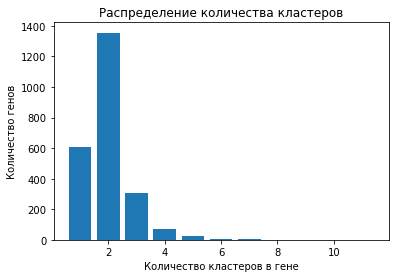

In [25]:
lengths = list(length_distribution.keys())
counts = list(length_distribution.values())

# Построение гистограммы
plt.bar(lengths, counts)

# Добавление подписей и заголовка
plt.xlabel('Количество кластеров в гене')
plt.ylabel('Количество генов')
plt.title('Распределение количества кластеров')

# Отображение гистограммы
plt.show()

In [97]:
sps.spearmanr(buf['IJC_SJC'].to_list(), axis=0).statistic

nan